![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# DATA ANALYSIS OF COMMODITY PRICE DATASET USING `PYTHON`

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1266]:
## Load dataset

cmds = pd.read_csv("nigeria_food_prices.csv")
cmds.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
2,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
3,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
4,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN


In [1267]:
cmds.shape

(13278, 17)

In [1268]:
cmds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13278 entries, 0 to 13277
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      13278 non-null  object 
 1   cmname    13278 non-null  object 
 2   unit      13278 non-null  object 
 3   category  13278 non-null  object 
 4   price     13278 non-null  object 
 5   currency  13278 non-null  object 
 6   country   13278 non-null  object 
 7   admname   13278 non-null  object 
 8   adm1id    13278 non-null  object 
 9   mktname   13278 non-null  object 
 10  mktid     13277 non-null  float64
 11  cmid      13278 non-null  object 
 12  ptid      13277 non-null  float64
 13  umid      13277 non-null  float64
 14  catid     13278 non-null  object 
 15  sn        13278 non-null  object 
 16  default   0 non-null      float64
dtypes: float64(4), object(13)
memory usage: 1.7+ MB


#### Column names description

1) `date` - The date column

2) `cmname` - Commodity names

3) `unit` - Measure of commodity

4) `category` - Commodity category

5) `price` - Price of commodity

6) `currency` - Commodity price currency (ngn)

7) `country` - The dataset country (nigeria)

8) `admname` - State in country

9) `adm1id` - The state code

10) `mktname` - Marketplace name

11) `mktid` - The marketplace id

12) `cmid` - Commodity id

13) `ptid` - Not descriptive

14) `umid` - Not descriptive

15) `catid` - Commodity category id

16) `sn` - Serial number

17) `default` - Contains null values only

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 1) DATA CLEANING PROCESS

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1270]:
# Reimport the dataset
# Skip the first row
# Parse date column as datetime format

cmds = pd.read_csv("nigeria_food_prices.csv", parse_dates = ['date'], skiprows = [1])
cmds.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980,55,15,33,1,1980_55_15_33,NaN


In [1271]:
# Drop unwanted columns (currency, country, adm1id, mktid, cmid, ptid, umid, catid, sn, and default)

cmds.drop(columns = ['currency', 'country', 'adm1id', 'mktid', 'cmid', 'ptid', 'umid', 'catid', 'sn', 'default'], inplace = True)

In [1272]:
cmds.head()

,date,cmname,unit,category,price,admname,mktname
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi


In [1273]:
# Split the 'commodity name (cmname)' column to 'commodity' and 'enterprise' 

cmds['cmname'].value_counts()

Millet - Wholesale                  1223
Rice (imported) - Wholesale         1147
Bread - Retail                       668
Fuel (diesel) - Retail               665
Fuel (petrol-gasoline) - Retail      660
Cowpeas (white) - Wholesale          650
Maize (white) - Wholesale            649
Sorghum (white) - Wholesale          641
Groundnuts (shelled) - Wholesale     634
Sorghum (brown) - Wholesale          609
Rice (local) - Wholesale             609
Cowpeas (brown) - Wholesale          604
Gari (white) - Wholesale             593
Maize (yellow) - Wholesale           591
Sorghum - Wholesale                  576
Maize - Wholesale                    571
Oil (palm) - Wholesale               529
Gari (yellow) - Wholesale            489
Yam - Wholesale                      353
Yam - Retail                         281
Oil (palm) - Retail                  139
Wheat - Wholesale                     61
Maize (yellow) - Retail               42
Rice (imported) - Retail              42
Gari (white) - R

In [1274]:
# According to the report above, all comodities have either a retail or wholesale section seperated with '(-)'
# The only place '(-)' appears twice is 'Fuel (petrol-gasoline) - Retail'
# We can replace the (petrol-gasoline) with (petrol gasoline) to make the column uniform

cmds['cmname'] = cmds['cmname'].str.replace('petrol-gasoline', 'petrol gasoline')
cmds['cmname'].value_counts()

Millet - Wholesale                  1223
Rice (imported) - Wholesale         1147
Bread - Retail                       668
Fuel (diesel) - Retail               665
Fuel (petrol gasoline) - Retail      660
Cowpeas (white) - Wholesale          650
Maize (white) - Wholesale            649
Sorghum (white) - Wholesale          641
Groundnuts (shelled) - Wholesale     634
Sorghum (brown) - Wholesale          609
Rice (local) - Wholesale             609
Cowpeas (brown) - Wholesale          604
Gari (white) - Wholesale             593
Maize (yellow) - Wholesale           591
Sorghum - Wholesale                  576
Maize - Wholesale                    571
Oil (palm) - Wholesale               529
Gari (yellow) - Wholesale            489
Yam - Wholesale                      353
Yam - Retail                         281
Oil (palm) - Retail                  139
Wheat - Wholesale                     61
Maize (yellow) - Retail               42
Rice (imported) - Retail              42
Gari (white) - R

In [1275]:
# Since our cmname column is now uniform, we can split

cmds['cmname'].str.split('-', expand = True)

,0,1
0,Bread,Retail
1,Bread,Retail
2,Bread,Retail
3,Bread,Retail
4,Bread,Retail
...,...,...
13272,Gari (white),Wholesale
13273,Gari (white),Wholesale
13274,Gari (white),Wholesale
13275,Gari (white),Wholesale


In [1276]:
cmds['commodity'] = cmds['cmname'].str.split('-', expand = True)[0]
cmds['enterprise'] = cmds['cmname'].str.split('-', expand = True)[1]
cmds.head()

,date,cmname,unit,category,price,admname,mktname,commodity,enterprise
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail


In [1277]:
# Trimming the new columns to avoid whitespaces

cmds['commodity'] = cmds['commodity'].str.strip()
cmds['enterprise'] = cmds['enterprise'].str.strip()

In [1278]:
# Drop 'cmname' column

cmds.drop(columns = ['cmname'], inplace = True)
cmds.head()

,date,unit,category,price,admname,mktname,commodity,enterprise
0,2015-01-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
1,2015-02-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
2,2015-03-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
3,2015-04-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
4,2015-05-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail


In [1279]:
# Rename columns for better description

column_mapper = {'unit' : 'scale', 'admname':'state', 'mktname':'market_name'}
cmds.rename(columns = column_mapper, inplace = True)
cmds.head()

,date,scale,category,price,state,market_name,commodity,enterprise
0,2015-01-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
1,2015-02-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
2,2015-03-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
3,2015-04-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
4,2015-05-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# ANALYSING THE CLEAN DATASET

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

cmds.head()

In [1280]:
cmds.head()

,date,scale,category,price,state,market_name,commodity,enterprise
0,2015-01-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
1,2015-02-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
2,2015-03-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
3,2015-04-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail
4,2015-05-15,Unit,cereals and tubers,140.0,Adamawa,Mubi,Bread,Retail


In [1281]:
cmds.shape

(13277, 8)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 2) Anomalies and Outliers

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Are there any anomalies or outliers in the pricing data?

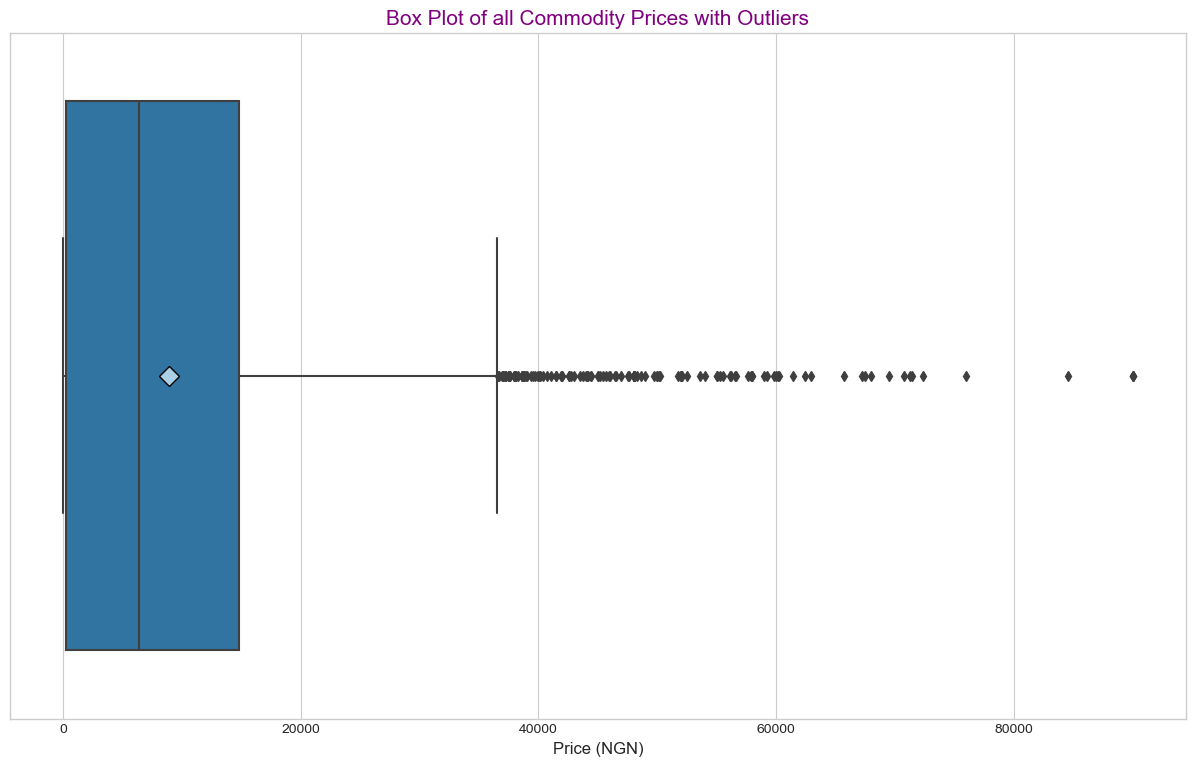

In [1282]:
# To check for outliers, we can use Boxplot and Interquartile range method to find the values of these outliers
# Using the Boxplot method
# Note - The marker in the diagram (Box Plot of all Commodity Prices with Outliers) represent the average price mark

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.boxplot(data = cmds, x = 'price', showmeans = True,
           meanprops={"marker": "D", "markeredgecolor": "black","markersize": "10"})
plt.title('Box Plot of all Commodity Prices with Outliers', fontsize = 15, color = 'purple')
plt.xlabel('Price (NGN)', fontsize = 12)
plt.show()

In [1283]:
# Mean Price of all commodities (8930.79 naira (NGN))

cmds['price'].mean().round(2)

8930.79

In [1284]:
# Median Price of all commodities (6375 naira (NGN))

cmds['price'].median()

6375.0

In [1544]:
# From the image above there are alot of abnormal prices in the price column
# We can use Interquartile range method to find the values of these outliers (IQRange)

Q1 = cmds['price'].quantile(0.25)
Q3 = cmds['price'].quantile(0.75)

IQRange = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQRange
upper_bound = Q3 + 1.5 * IQRange

# Identify outliers
outliers = cmds.loc[(cmds['price'] < lower_bound) | (cmds['price'] > upper_bound)]

outliers.sort_values('price', ascending = False)

,date,scale,category,price,state,market_name,commodity,enterprise
9995,2017-02-15,100 KG,cereals and tubers,90000.0,Yobe,Damaturu,Yam,Wholesale
9996,2017-03-15,100 KG,cereals and tubers,90000.0,Yobe,Damaturu,Yam,Wholesale
9987,2016-02-15,100 KG,cereals and tubers,90000.0,Yobe,Damaturu,Yam,Wholesale
7716,2016-08-15,100 KG,cereals and tubers,84600.0,Kebbi,Gwandu,Yam,Wholesale
7715,2016-07-15,100 KG,cereals and tubers,76000.0,Kebbi,Gwandu,Yam,Wholesale
...,...,...,...,...,...,...,...,...
10835,2017-10-15,100 KG,pulses and nuts,37000.0,Yobe,Potiskum,Cowpeas (brown),Wholesale
4718,2017-10-15,100 KG,pulses and nuts,37000.0,Kaduna,Saminaka,Cowpeas (brown),Wholesale
7724,2018-02-15,100 KG,cereals and tubers,36900.0,Kebbi,Gwandu,Yam,Wholesale
8058,2017-09-15,100 KG,pulses and nuts,36690.0,Kebbi,Gwandu,Cowpeas (brown),Wholesale


In [1286]:
# Outliers Count of all comodity prices

len(outliers)

136

##### ANSWER 
##### * There are outliers in the price data for all comodities

##### * The price data is positively skewed, which means most of the commodity prices are lesser than the average price of all commodities (8930.79 naira (NGN))

#### What could be the potential reasons for these outliers?

In [1287]:
# The price outliers exist for some reasons
# We can check all columns of these outliers to find out

# a) Outlier Count over unit of commodities

outliers['scale'].value_counts()

100 KG    136
Name: scale, dtype: int64

In [1288]:
# b) Outlier Count over category of commodities

outliers['category'].value_counts()

cereals and tubers    100
pulses and nuts        36
Name: category, dtype: int64

In [1289]:
# c) Outlier Count over state of commodities

outliers['state'].value_counts()

Kebbi      32
Adamawa    23
Lagos      19
Borno      13
Yobe       13
Jigawa     12
Abia        8
Oyo         7
Kaduna      6
Katsina     2
Zamfara     1
Name: state, dtype: int64

In [1290]:
# d) Outlier Count over market_name of commodities

outliers['market_name'].value_counts()

Gwandu          32
Mubi            23
Lagos           19
Gujungu         12
Damaturu        10
Aba              8
Biu              7
Ibadan           7
Maiduguri        6
Giwa             5
Potiskum         3
Dandume          2
Saminaka         1
Kaura Namoda     1
Name: market_name, dtype: int64

In [1291]:
# e) Outlier Count over commodities

outliers['commodity'].value_counts()

Yam                     89
Groundnuts (shelled)    19
Cowpeas (brown)         15
Gari (yellow)            9
Rice (local)             2
Cowpeas (white)          2
Name: commodity, dtype: int64

In [1292]:
# ei) Outlier Count over commodities per category

outliers.groupby('category')['commodity'].value_counts()

category            commodity           
cereals and tubers  Yam                     89
                    Gari (yellow)            9
                    Rice (local)             2
pulses and nuts     Groundnuts (shelled)    19
                    Cowpeas (brown)         15
                    Cowpeas (white)          2
Name: commodity, dtype: int64

In [1293]:
# f) Outlier Count over enterprise

outliers['enterprise'].value_counts()

Wholesale    136
Name: enterprise, dtype: int64

In [1294]:
# g) Outlier Count over time (per year)

outliers['date'].dt.year.value_counts().sort_index()

2014     9
2015    22
2016    43
2017    47
2018    15
Name: date, dtype: int64

##### ANSWER - Potential reasons for these outliers are
    * All of the outlier enterprise comprises of wholesalers 
    
    * The scale measure where these outliers exist is 100kg
    
    * Most of the categories for the outliers are "cereals and tubers" and "pulses and nuts" out
      of the 4 categories in the dataset
      
    * The statement above is proven if the commodities of these outliers are checked, in "(ei)" above
      It shows the commodity by categories, and all fall under "cereals and tubers" and "pulses and nuts"
      
    * These outliers can also be caused due to price range from selective states "(c)" and market_name (place) "(d)" above
    
    * Over time, it has shown that these price outliers count increase "(g)", except for 2014 and 2018 (because it does
       not contain complete data for all months in these years), but for 2015, 2016 and 2017, there was an increase.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 3) Price Trends and Patterns (4 commodities chosen)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

####   How have commodity prices changed over time for 4 (your choice) different commodities?

In [1295]:
# There are 22 unique commodities in this dataset

cmds['commodity'].nunique()

22

In [1296]:
# Name of all commodities

cmds['commodity'].unique()

array(['Bread', 'Oil (palm)', 'Rice (imported)', 'Maize (white)',
       'Rice (local)', 'Millet', 'Yam', 'Groundnuts (shelled)',
       'Sorghum (white)', 'Maize (yellow)', 'Fuel (diesel)',
       'Fuel (petrol gasoline)', 'Cowpeas (white)', 'Cowpeas (brown)',
       'Sorghum (brown)', 'Gari (yellow)', 'Gari (white)', 'Maize',
       'Sorghum', 'Wheat', 'Beans (niebe)', 'Yam (Abuja)'], dtype=object)

In [1297]:
# Name of all commodities per category (per count)

cmds.groupby('category')['commodity'].value_counts()

category            commodity             
cereals and tubers  Millet                    1238
                    Rice (imported)           1189
                    Bread                      668
                    Maize (white)              664
                    Sorghum (white)            655
                    Rice (local)               636
                    Yam                        634
                    Maize (yellow)             633
                    Gari (white)               625
                    Sorghum (brown)            624
                    Sorghum                    576
                    Maize                      571
                    Gari (yellow)              521
                    Wheat                       61
                    Yam (Abuja)                 17
non-food            Fuel (diesel)              665
                    Fuel (petrol gasoline)     660
oil and fats        Oil (palm)                 668
pulses and nuts     Cowpeas (white)    

Let's pick one commodity from each category and analyse 
* cereals and tubers `(Millet)`
* non-food `(Fuel (diesel))`
* oil and fats `(Oil (palm))`
* pulses and nuts `(Cowpeas (white))`

### Picking 4 commodities (1 from each category)

#### Ai Commodity 1 `(cereals and tubers - Millet)`

##### Checking the millet prices over time and other facts (Notes)

In [1298]:
# Commodity 1 (cereals and tubers - Millet)

df_millet = cmds[cmds['commodity'] == 'Millet']
df_millet.head()

,date,scale,category,price,state,market_name,commodity,enterprise
170,2015-01-15,100 KG,cereals and tubers,9000.0,Adamawa,Mubi,Millet,Wholesale
171,2015-02-15,100 KG,cereals and tubers,9000.0,Adamawa,Mubi,Millet,Wholesale
172,2015-03-15,100 KG,cereals and tubers,9340.0,Adamawa,Mubi,Millet,Wholesale
173,2015-04-15,100 KG,cereals and tubers,10250.0,Adamawa,Mubi,Millet,Wholesale
174,2015-05-15,100 KG,cereals and tubers,11250.0,Adamawa,Mubi,Millet,Wholesale


In [1299]:
# Facts about millet
# Note - Most of the people who supply millets are wholesalers

df_millet['enterprise'].value_counts()

Wholesale    1223
Retail         15
Name: enterprise, dtype: int64

In [1300]:
# Facts about millet
# Note - It is measured per 1kg or 100kg when distributing

df_millet['scale'].value_counts()

100 KG    649
KG        589
Name: scale, dtype: int64

In [1301]:
# Facts about millet
# Note - All states that supply millet are 14.
#       Adamawa, Borno, Jigawa, Kaduna, Kano, Katsina, Kebbi,
#       Lagos, Oyo, Yobe, Abia, Gombe, Sokoto, Zamfara

df_millet['state'].unique()

array(['Adamawa', 'Borno', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi',
       'Lagos', 'Oyo', 'Yobe', 'Abia', 'Gombe', 'Sokoto', 'Zamfara'],
      dtype=object)

In [1302]:
# Facts about millet
# Note - The top 5 states that supplies millet are Katsina, Borno,
#         Sokoto, Jigawa, and Kaduna.

df_millet['state'].value_counts().head()

Katsina    301
Borno      173
Sokoto     146
Jigawa     131
Kaduna      87
Name: state, dtype: int64

In [1303]:
# Facts about millet
# Note - List of all markets supplying millet (21)

df_millet['market_name'].unique()

array(['Mubi', 'Damassack (CBM)', 'Biu', 'Maiduguri', 'Mai Gatari (CBM)',
       'Gujungu', 'Giwa', 'Saminaka', 'Dawanau', 'Jibia (CBM)',
       'Mai Adoua (CBM)', 'Dandume', 'Gwandu', 'Lagos', 'Ibadan',
       'Damaturu', 'Potiskum', 'Aba', 'Gombe', 'Illela (CBM)',
       'Kaura Namoda'], dtype=object)

In [1304]:
# To find Average price of millet over the years...
# We need to find the price for 1kg over time since our dataset contains..
# scale in KG and 100KG, we can find the millet price in KG overtime by..
# converting all millet scale to 1KG and price/100 where scale is 100 KG

# Create a copy of millet dataframe (df_millet)

df_millet2 = df_millet.copy()
df_millet2.head()

,date,scale,category,price,state,market_name,commodity,enterprise
170,2015-01-15,100 KG,cereals and tubers,9000.0,Adamawa,Mubi,Millet,Wholesale
171,2015-02-15,100 KG,cereals and tubers,9000.0,Adamawa,Mubi,Millet,Wholesale
172,2015-03-15,100 KG,cereals and tubers,9340.0,Adamawa,Mubi,Millet,Wholesale
173,2015-04-15,100 KG,cereals and tubers,10250.0,Adamawa,Mubi,Millet,Wholesale
174,2015-05-15,100 KG,cereals and tubers,11250.0,Adamawa,Mubi,Millet,Wholesale


In [1305]:
# Write a function to update scale and price in our new millet dataframe (the copy/duplicate) 
# Which means change all the scale of millet to 'KG' and price/100 where scale = '100 KG'

def update_scale_and_price(dataframe):
    mask = dataframe['scale'] == '100 KG'
    dataframe.loc[mask, 'price'] = dataframe.loc[mask, 'price'] / 100
    dataframe.loc[mask, 'scale'] = 'KG'
    dataframe['price'] = dataframe['price'].round(2)
    
    return dataframe.sort_values('date')

updated_df_millet = update_scale_and_price(df_millet2)
updated_df_millet

,date,scale,category,price,state,market_name,commodity,enterprise
12298,2002-01-15,KG,cereals and tubers,146.95,Sokoto,Illela (CBM),Millet,Wholesale
5949,2002-01-15,KG,cereals and tubers,150.18,Katsina,Jibia (CBM),Millet,Wholesale
5950,2002-02-15,KG,cereals and tubers,148.54,Katsina,Jibia (CBM),Millet,Wholesale
12299,2002-03-15,KG,cereals and tubers,182.36,Sokoto,Illela (CBM),Millet,Wholesale
5951,2002-03-15,KG,cereals and tubers,175.00,Katsina,Jibia (CBM),Millet,Wholesale
...,...,...,...,...,...,...,...,...
2954,2018-05-15,KG,cereals and tubers,123.80,Jigawa,Gujungu,Millet,Wholesale
6923,2018-05-15,KG,cereals and tubers,135.36,Katsina,Dandume,Millet,Wholesale
11344,2018-05-15,KG,cereals and tubers,130.00,Gombe,Gombe,Millet,Wholesale
1134,2018-05-15,KG,cereals and tubers,149.12,Borno,Biu,Millet,Wholesale


In [1306]:
# Facts about millet
# Since the scale of the millet dataset has been updated (all in KG), we can now find the maximum and minimum price overtime.

# Note - The minimum price of millet overtime is 40 naira (ngn) per KG

updated_df_millet['price'].min()

40.0

In [1307]:
# Facts about millet
# Note - The maximum price of millet overtime is 300 naira (ngn) per KG

updated_df_millet['price'].max()

300.0

In [1308]:
# Note - All scale measures are now on KG

updated_df_millet['scale'].value_counts()

KG    1238
Name: scale, dtype: int64

In [1309]:
# Facts about millet
# To find Average price of millet over the years...

Avg_p_millet = updated_df_millet.groupby(updated_df_millet['date'].dt.year)['price'].mean().round(2)
Avg_p_millet

date
2002    162.46
2003    102.88
2005    178.01
2006    140.72
2007    120.79
2008    171.04
2009    157.61
2010    164.86
2011    163.65
2012    209.45
2013    225.55
2014    120.81
2015     74.18
2016    113.99
2017    157.90
2018    131.70
Name: price, dtype: float64

###### Answer 
###### - The price overtime per KG has been `MOSTLY above 50 naira(ngn)` except for year 2014, 2015 and 2016 where price was below 50 naira (NGN) sometimes. `(Check - Distribution of Millet price overtime (Yearly) image below)`

###### - The top 3 years of millet trading was in 2015, 2016 and 2017 `(Check - Millet Trades overtime (Yearly) image below)`

###### - Millet trades increased above 100 from 2014 to 2017 `(Check - Millet Trades overtime (Yearly) image below)`

###### - There were no millet trades/traded in 2004 (in all 21 markets) `(Check both images below)`

###### - In 2003 and 2006, the price distribution is negatively skewed, which means probability of getting millet at a price above yearly average price (mean) is high.

###### - In 2017, there was normal price distribution (Mean price and Median Price is very close), during this period

In [1310]:
# Distribution of price of millet yearly (Minimum, Average, Middle and Maximum price)

millet_prange = updated_df_millet.groupby(updated_df_millet['date'].dt.year)['price'].agg(['min', 'mean', 'median', 'max'])
millet_prange

,min,mean,median,max
date,,,,
2002,97.38,162.458400,150.180,233.42
2003,73.92,102.875758,107.830,136.06
2005,108.37,178.013125,164.785,297.35
2006,134.43,140.715385,141.940,148.32
2007,109.06,120.790000,119.325,159.25
2008,129.45,171.036739,166.950,228.33
2009,109.09,157.613500,156.425,195.00
2010,131.18,164.863729,162.130,216.58
2011,137.11,163.648000,162.065,205.85


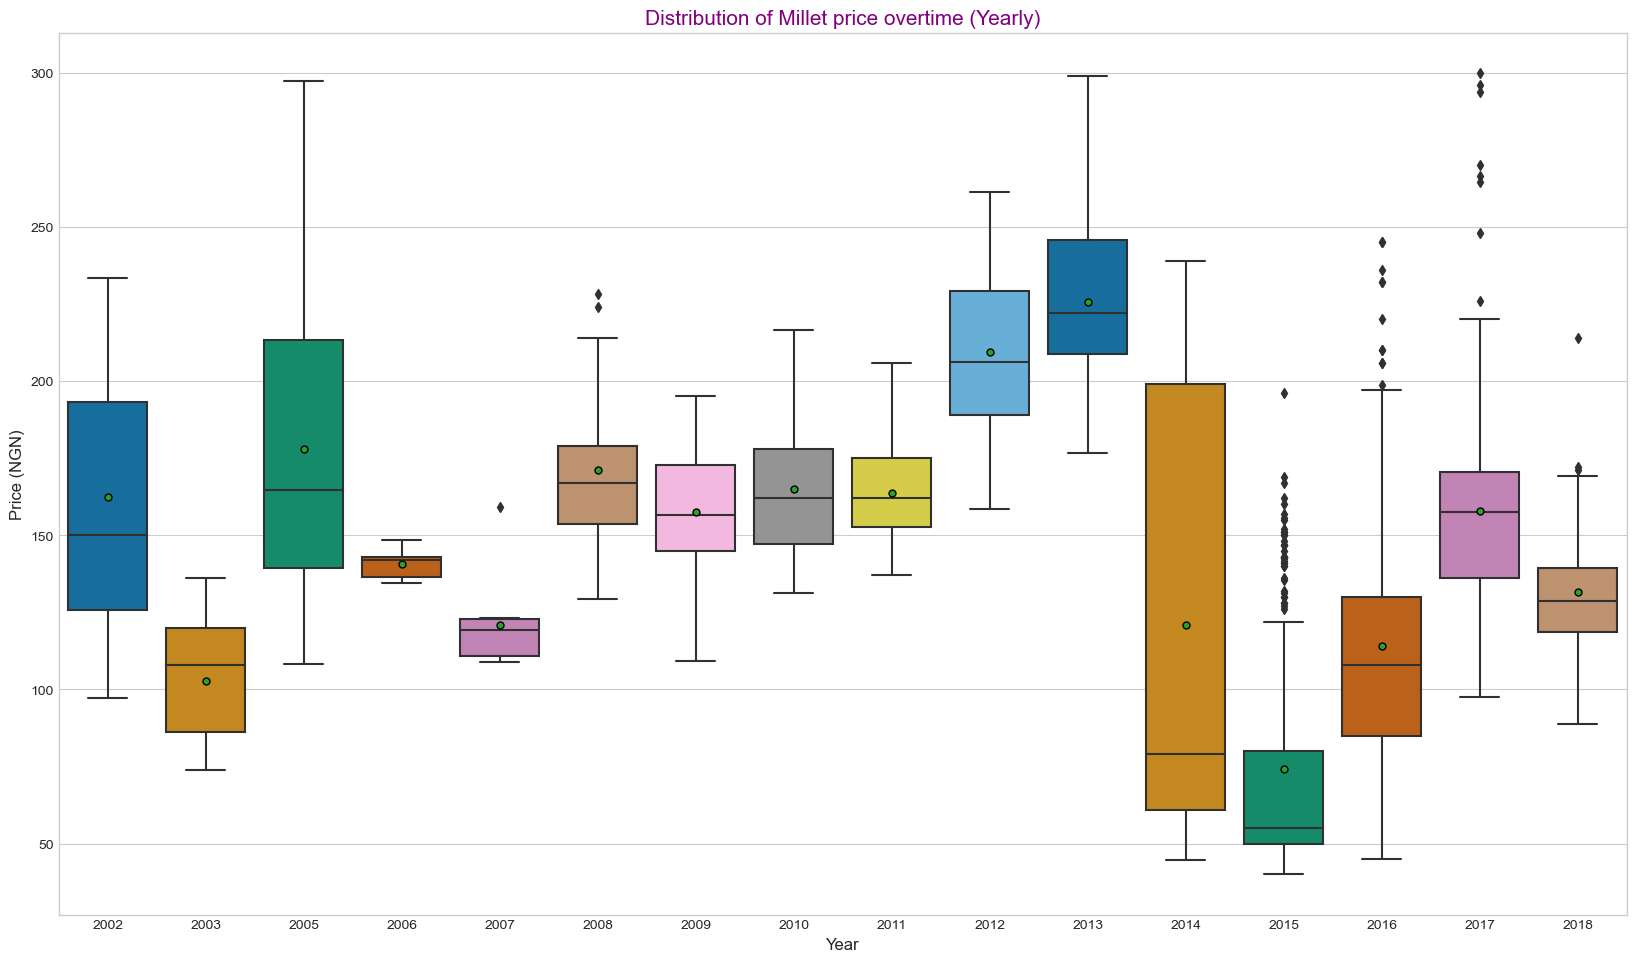

In [1311]:
# Note - The marker in the diagram (Distribution of Millet price overtime (Yearly)) represent the average price mark

plt.figure(figsize=(16, 9))
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')

sns.boxplot(data = updated_df_millet, x = updated_df_millet['date'].dt.year, y='price', palette = 'colorblind', showmeans = True,
           meanprops={"marker": "o", "markeredgecolor": "black", "markersize": "5"})

plt.title('Distribution of Millet price overtime (Yearly)', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.show()

In [1312]:
# Facts about millet
# Note - Millet traded mostly during the years 2015, 2016 and 2017

No_of_mtrades_yearly = updated_df_millet.groupby(updated_df_millet['date'].dt.year)['commodity'].value_counts().unstack()
No_of_mtrades_yearly

commodity,Millet
date,
2002,25
2003,33
2005,32
2006,13
2007,10
2008,46
2009,40
2010,59
2011,60


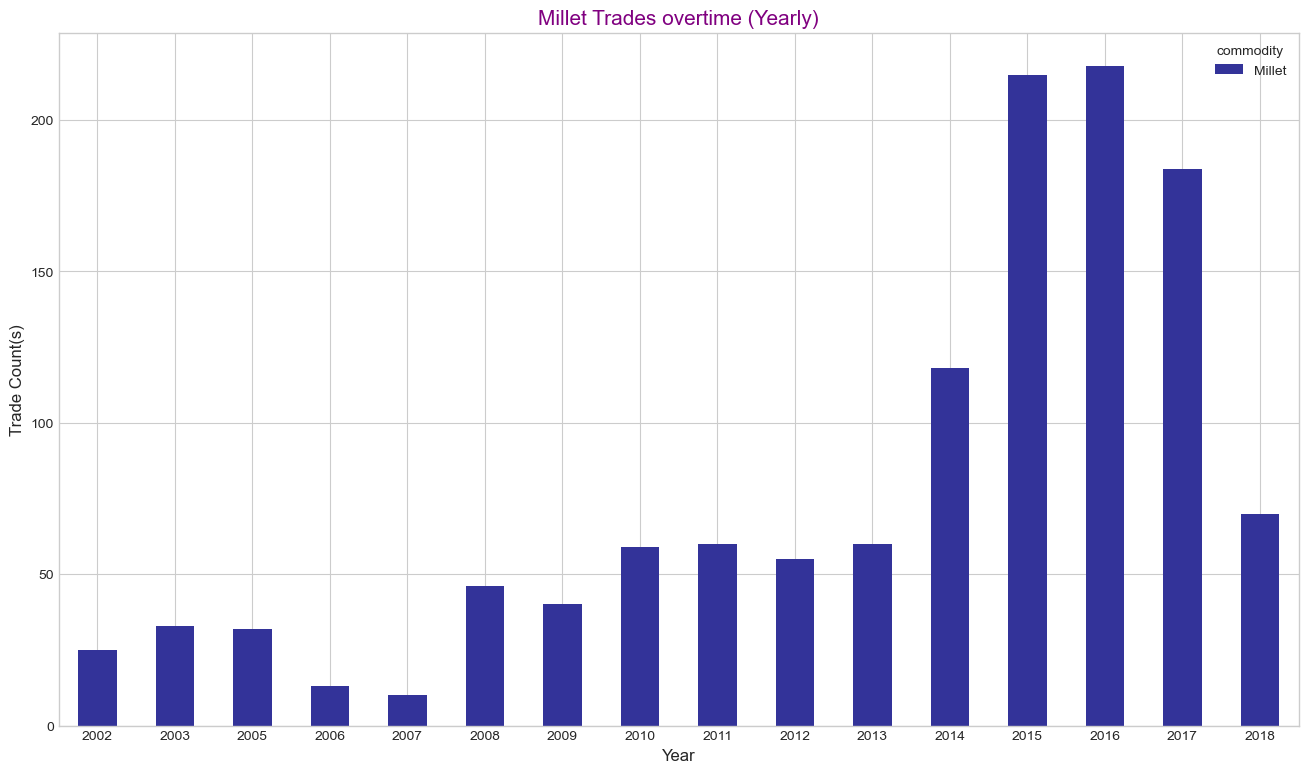

In [1313]:
# Facts about Millet
# Note - The rise of millet trades increased above 100 in 2014 - 2017
#        2018 could also be above 100 trades but due to incomplete data, it's not certain 

No_of_mtrades_yearly.plot(kind = 'bar',
                         figsize=(16, 9),
                         colormap = 'terrain')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Trade Count(s)', fontsize = 12)
plt.xticks(rotation = 360)
plt.title('Millet Trades overtime (Yearly)', fontsize = 15, color = 'purple')
plt.show()

##### Are there any noticeable trends in the price data (over time) for millet?

###### Answer 
###### * Over time according to the diagram below, the price range of millet falls between 100 naira (NGN) and 180 naira (NGN) mostly

###### * There was a shape decline in average price of millet from 2014 to 2015 (This is also the lowest Average price (2015)) 

###### * Despite the high trading volume in 2015 (above 200), it still recorded the lowest average price in history (Which supports the postively skewed distribution of price during this period).

###### * The highest Average Price was within the year 2013 despite been positively skewed.

###### * There was a slight stable average price range between the year 2009 to 2011 (Average price range was 156 naira to 164 naira)

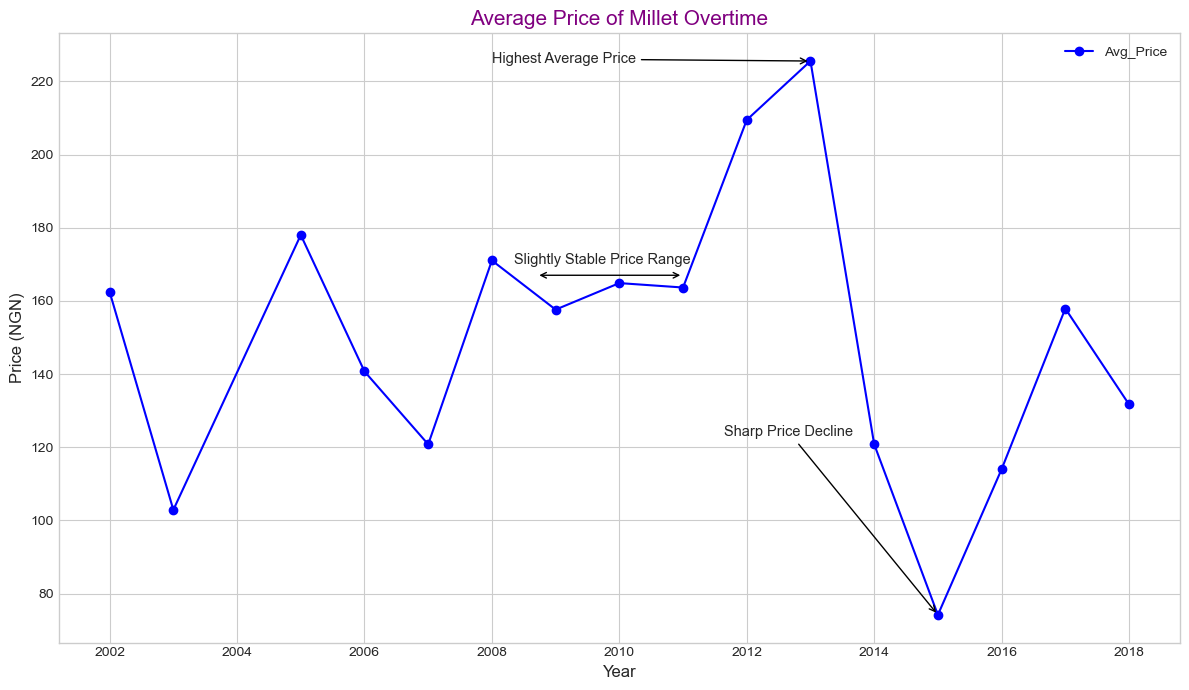

In [1314]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
plt.plot(Avg_p_millet, marker='o', color='b', label='Avg_Price')
plt.title('Average Price of Millet Overtime', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)

plt.annotate('Sharp Price Decline', 
             xy=(2015, 74.18), 
             xytext=(2011.65, 123),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('', 
             xy=(2008.7, 167), 
             xytext=(2011, 167),
             arrowprops=dict(arrowstyle='<->', color='black'))

plt.annotate('Slightly Stable Price Range', 
             xy=(2008.7, 167), 
             xytext=(2008.35, 170), fontsize = 10.5)

plt.annotate('Highest Average Price', 
             xy=(2013, 225.55), 
             xytext=(2008, 225),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.legend()
plt.tight_layout()
plt.show()

In [1315]:
# Facts about millet
# Proof that Over time according to the diagram above, the price range of millet falls between 100 naira (NGN) and 180 naira (NGN) mostly 

# Price above 180 naira (NGN) count. (260 occasions of price above 200)

updated_df_millet[updated_df_millet['price'] > 180]['price'].count()

260

In [1316]:
# Price between 100 naira (NGN) and 180 naira (NGN) count. (639 occasions of price between 100 and 180) ##PROOF

updated_df_millet[(updated_df_millet['price'].between(100, 180))]['price'].count()

639

In [1317]:
# Facts about millet
# Price below 100 naira (NGN) count. (339 occasions of price below 100)

updated_df_millet[updated_df_millet['price'] < 100]['price'].count()

339

##### How does millet prices vary across different markets?

In [1318]:
# Using updated_df_millet, because it contains price per KG of millet overtime

updated_df_millet.sort_values('date')

,date,scale,category,price,state,market_name,commodity,enterprise
12298,2002-01-15,KG,cereals and tubers,146.95,Sokoto,Illela (CBM),Millet,Wholesale
5949,2002-01-15,KG,cereals and tubers,150.18,Katsina,Jibia (CBM),Millet,Wholesale
5950,2002-02-15,KG,cereals and tubers,148.54,Katsina,Jibia (CBM),Millet,Wholesale
12299,2002-03-15,KG,cereals and tubers,182.36,Sokoto,Illela (CBM),Millet,Wholesale
5951,2002-03-15,KG,cereals and tubers,175.00,Katsina,Jibia (CBM),Millet,Wholesale
...,...,...,...,...,...,...,...,...
9226,2018-05-15,KG,cereals and tubers,161.00,Oyo,Ibadan,Millet,Wholesale
202,2018-05-15,KG,cereals and tubers,118.24,Adamawa,Mubi,Millet,Wholesale
8459,2018-05-15,KG,cereals and tubers,172.16,Lagos,Lagos,Millet,Wholesale
10609,2018-05-15,KG,cereals and tubers,124.00,Yobe,Potiskum,Millet,Wholesale


In [1319]:
# There are 21 unique markets that sells millet

updated_df_millet['market_name'].nunique()

21

In [1320]:
# All market place/name that sells millet

updated_df_millet['market_name'].unique()

array(['Illela (CBM)', 'Jibia (CBM)', 'Mai Adoua (CBM)',
       'Damassack (CBM)', 'Mai Gatari (CBM)', 'Ibadan', 'Dawanau',
       'Kaura Namoda', 'Gujungu', 'Lagos', 'Gombe', 'Gwandu', 'Maiduguri',
       'Saminaka', 'Giwa', 'Dandume', 'Damaturu', 'Potiskum', 'Mubi',
       'Biu', 'Aba'], dtype=object)

In [1321]:
# Distribution of price of millet across all 21 markets (Minimum, Average, Middle and Maximum price overtime)

mkt_m_prange = updated_df_millet.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max'])
mkt_m_prange

,min,mean,median,max
market_name,,,,
Aba,264.40,281.750000,281.800,300.00
Biu,48.00,112.758462,131.000,180.48
Damassack (CBM),89.50,181.920920,182.000,268.32
Damaturu,42.10,95.594103,104.000,156.80
Dandume,48.05,93.296136,88.675,178.00
Dawanau,42.00,94.881277,97.500,158.75
Giwa,47.60,96.079000,71.165,185.00
Gombe,41.80,93.872979,100.000,173.00
Gujungu,41.25,92.348936,94.900,176.50


###### Answer
###### * Only 9 market places has average price below 100 naira (NGN). They are Gujungu, Gwandu, Dandume, Gombe, Dawanau, Kaura Namoda, Damaturu, Giwa, Potiskum

###### * Aba market has the highest average market price of 281.75 naira (NGN), it also records the highest price of millet in history and 

###### * Gujungu has the lowest average market price of 92.35 naira (NGN)

###### * The top 5 markets (Illela (CBM), Mai Adoua (CBM), Jibia (CBM), Damassack (CBM), and Mai Gatari (CBM)) which supply millet overtime are also amongst the top 6 markets with high average millet price.

###### * In 2013, only 5 major markets was supplying millet, which is why they were able to set high prices. It records the only period average price overtime was the highest

###### * In 2015, 15 out of 20 markets place set their average price below 100 naira (NGN), that's why the lowest average price overtime was recorded during this period.

###### * In Aba, Damassack (CBM) and Gwandu market, there is normal distribution of price.

###### * In Biu, Damaturu, Dawanau, Gombe, Gujungu, Kaura Namoda, Maiduguri and Potiskum market, the price distribution is negatively skewed, which means probability of getting millet at a price above the average price in the market is high `(Millet is more expensive here)` `(Check - mkt_m_prange)`

###### * In Dandume, Giwa, Ibadan, Illela (CBM), Jibia (CBM), Lagos, Mai Adoua (CBM), Mai Gatari (CBM), Mubi, and Saminaka market, the price distribution is positively skewed, which means probability of getting millet at a price below the average price in the market is high `(Millet is cheaper here)` `(Check - mkt_m_prange)`

In [1322]:
# Market order interms of increasing average price of millet

m_mktorder = updated_df_millet.groupby("market_name")["price"].mean().sort_values().index
m_mktorder

Index(['Gujungu', 'Gwandu', 'Dandume', 'Gombe', 'Dawanau', 'Kaura Namoda',
       'Damaturu', 'Giwa', 'Potiskum', 'Saminaka', 'Maiduguri', 'Biu', 'Mubi',
       'Ibadan', 'Lagos', 'Illela (CBM)', 'Mai Adoua (CBM)',
       'Mai Gatari (CBM)', 'Jibia (CBM)', 'Damassack (CBM)', 'Aba'],
      dtype='object', name='market_name')

In [1323]:
# Top 5 millet market sellers

updated_df_millet['market_name'].value_counts().head()

Illela (CBM)        146
Mai Adoua (CBM)     134
Jibia (CBM)         123
Damassack (CBM)      87
Mai Gatari (CBM)     84
Name: market_name, dtype: int64

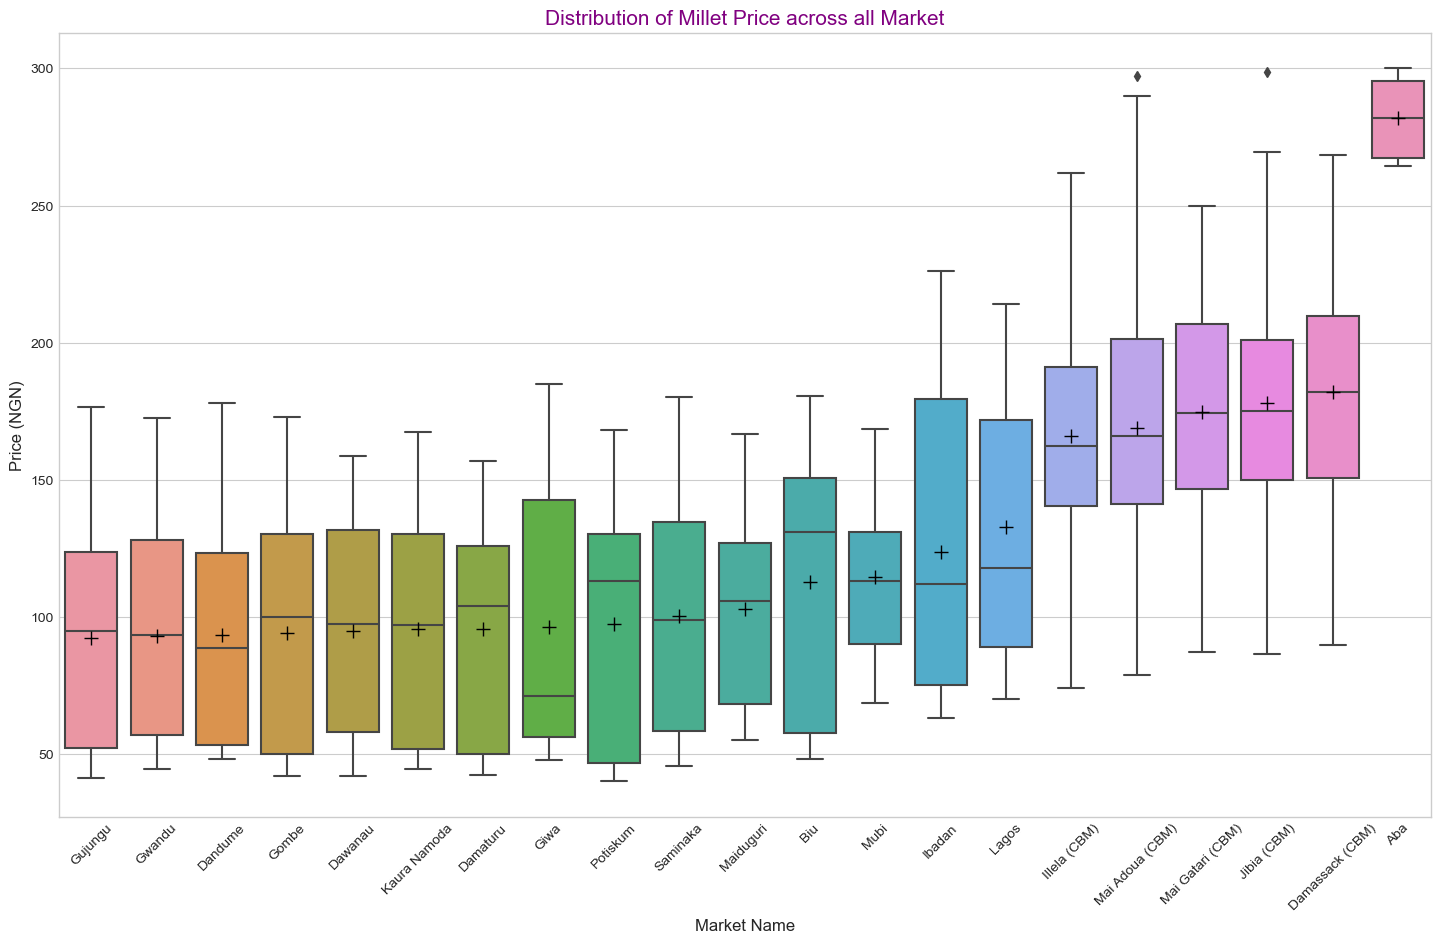

In [1416]:
# Note - The marker in the diagram (Distribution of Millet Price across all Market) represent the average price mark


plt.style.use('_mpl-gallery')
plt.figure(figsize=(14, 8))

sns.boxplot(data = updated_df_millet, x = 'market_name', y = 'price', showmeans = True, order = m_mktorder,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xticks(rotation = 45)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.xlabel('Market Name', fontsize = 12)
plt.title('Distribution of Millet Price across all Market', fontsize = 15, color = 'purple')
plt.show()

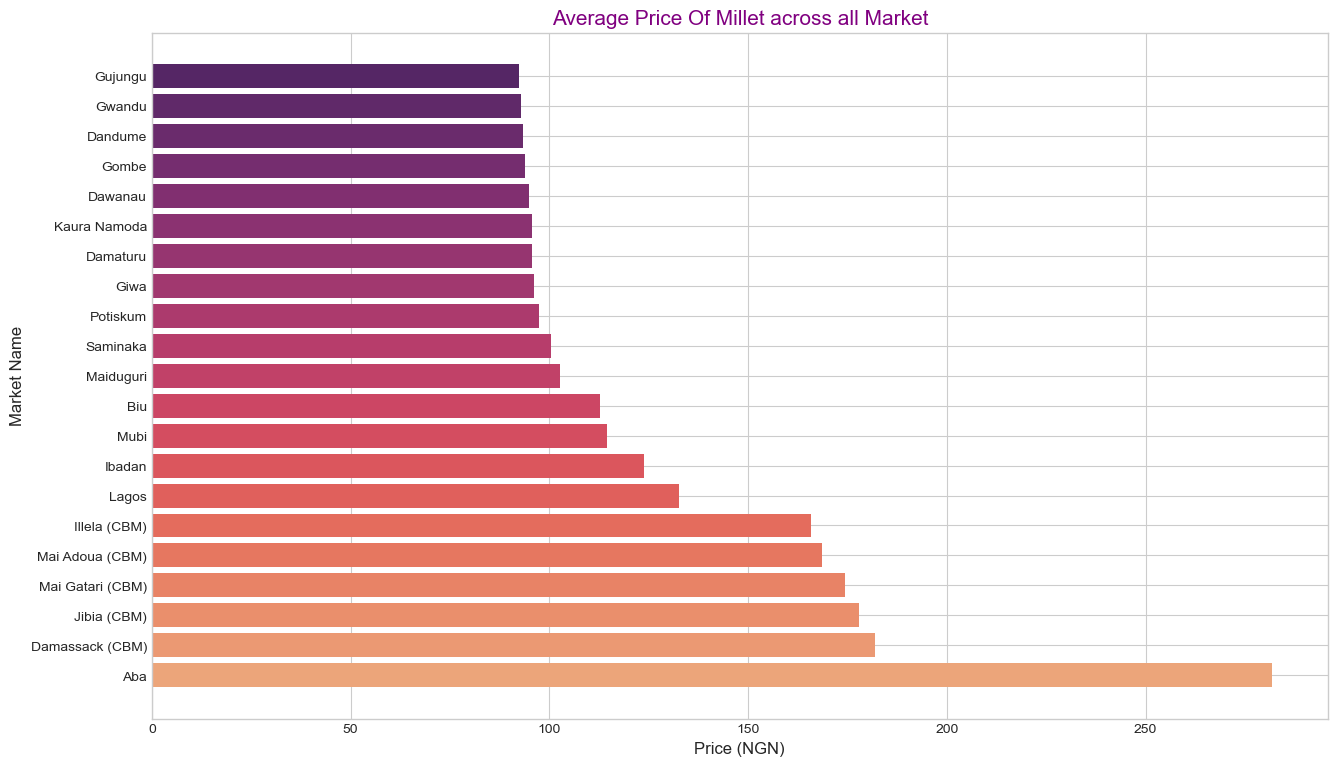

In [1417]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(12, 7))
plt.barh(Avg_mkt_p.index, Avg_mkt_p, color=sns.color_palette('flare', len(Avg_mkt_p)))
plt.xlabel('Price (NGN)', fontsize = 12)
plt.ylabel('Market Name', fontsize = 12)
plt.title('Average Price Of Millet across all Market', fontsize = 15, color = 'purple')
plt.show()

In [1325]:
# Checking for price across market in 2013 and 2015 as the highest and lowest point in time of average millet price (from previous data)

# In 2013 
# As seen, There were only 5 market places supplying millets in 2013,..
# they also happen to be the largest supplier of millet overtime, which proves why...
# they were able to dictate the average price at that period in time

updated_df_millet.loc[updated_df_millet['date'].dt.year == 2013].groupby('market_name')['price'].mean().round(2).sort_values(ascending = False)

market_name
Jibia (CBM)         240.12
Mai Adoua (CBM)     230.14
Damassack (CBM)     224.34
Mai Gatari (CBM)    217.69
Illela (CBM)        215.46
Name: price, dtype: float64

In [1326]:
# In 2015
# As seen, apart from the top 5 markets, most of the other market places (15) did not set their average price above 100 naira (NGN)...
# This proves why there was a low average price in 2015 (the lowest in time), because 15 other markets did not conform to the top 5 market suppliers 

updated_df_millet.loc[updated_df_millet['date'].dt.year == 2015].groupby('market_name')['price'].mean().round(2).sort_values(ascending = False)

market_name
Damassack (CBM)     196.00
Jibia (CBM)         148.90
Illela (CBM)        147.64
Mai Adoua (CBM)     142.91
Mai Gatari (CBM)    126.13
Mubi                 91.75
Lagos                79.40
Ibadan               72.67
Maiduguri            62.91
Biu                  55.04
Gwandu               53.15
Giwa                 52.98
Saminaka             52.70
Dandume              51.70
Kaura Namoda         50.59
Dawanau              50.45
Gujungu              48.15
Gombe                47.11
Damaturu             46.10
Potiskum             43.32
Name: price, dtype: float64

##### Are there any states where millet is consistently cheaper or expensive?

###### Answer

###### * Abia state has the highest recorded millet price in history.

###### * Abia and Kebbi state has normal price distribution. (Mean and Median are very close)

###### * Borno, Gombe, Jigawa, Kano, Yobe and Zamfara state have negative skewed price distribution, that means probablity of getting millet above average price in the state is high `(Millet is more expensive here)` `(Check - st_m_prange)`

###### * Adamawa, Kaduna, Lagos, Oyo, and Sokoto state have positive skewed price distribution, that means probablity of getting millet below average price in the state is high `(Millet is cheaper here)` `(Check - st_m_prange)`

###### * In all states, it is possible to get millet below 100 naira (NGN) at a period in time except for Abia state

In [1327]:
# Distribution of price of millet across all 14 states (Minimum, Average, Middle and Maximum price overtime)


st_m_prange = updated_df_millet.groupby('state')['price'].agg(['min', 'mean', 'median', 'max'])
st_m_prange

,min,mean,median,max
state,,,,
Abia,264.40,281.750000,281.800,300.00
Adamawa,68.40,114.624545,113.150,168.50
Borno,48.00,144.809480,148.000,268.32
Gombe,41.80,93.872979,100.000,173.00
Jigawa,41.25,145.027099,147.690,250.00
Kaduna,45.60,98.384368,83.000,185.00
Kano,42.00,94.881277,97.500,158.75
Katsina,48.05,161.387409,161.820,298.77
Kebbi,44.60,92.926383,93.450,172.48


In [1484]:
# State order interms of increasing average price of millet

m_storder = updated_df_millet.groupby("state")["price"].mean().sort_values().index
m_storder

Index(['Kebbi', 'Gombe', 'Kano', 'Zamfara', 'Yobe', 'Kaduna', 'Adamawa', 'Oyo',
       'Lagos', 'Borno', 'Jigawa', 'Katsina', 'Sokoto', 'Abia'],
      dtype='object', name='state')

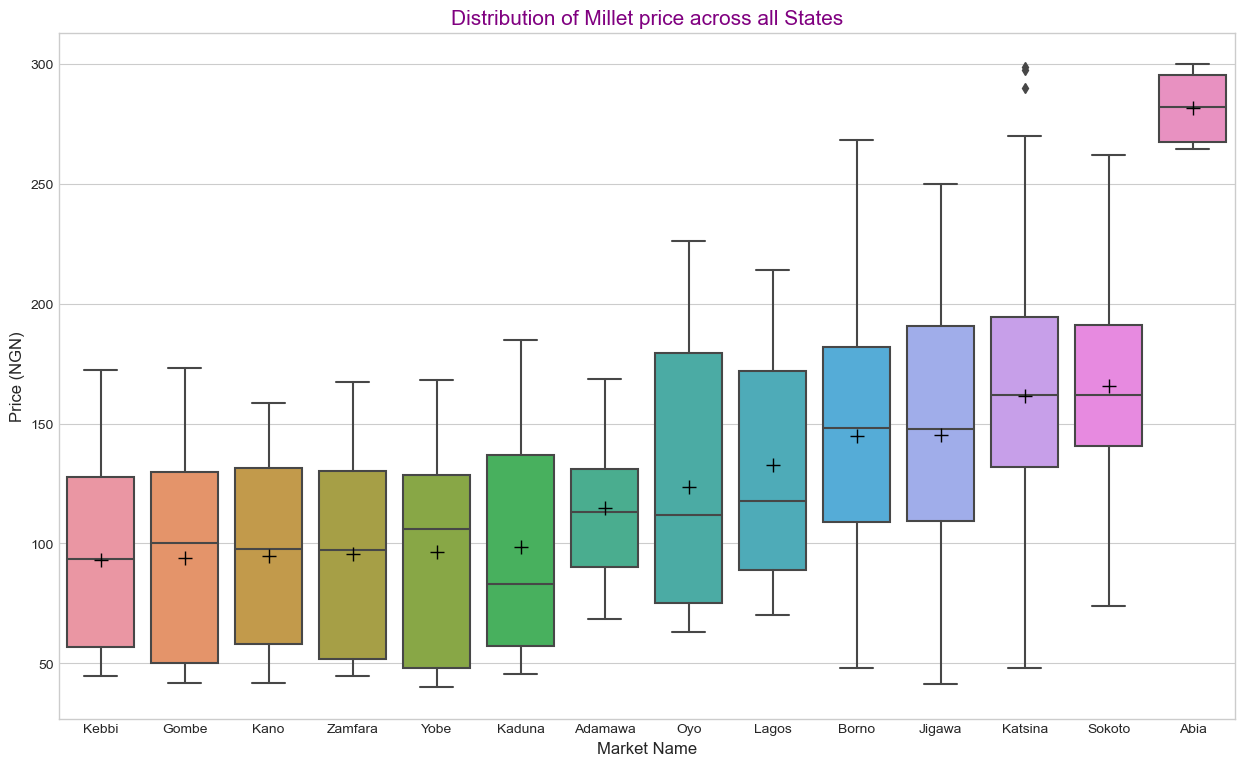

In [1485]:
# Note - The marker in the diagram (Distribution of Millet price across all States) represent the average price mark


plt.figure(figsize=(12, 7))
sns.boxplot(data = updated_df_millet, x = 'state', y = 'price', order = m_storder, showmeans = True,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xlabel('Market Name', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.title('Distribution of Millet price across all States', fontsize = 15, color = 'purple')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Bi Commodity 2 `(non-food - (Fuel (diesel))`

##### Checking the Fuel (diesel) prices over time and other facts (Notes)

In [1330]:
# Commodity 2 (Fuel (diesel))

df_fuel_diesel = cmds[cmds['commodity'] == 'Fuel (diesel)']
df_fuel_diesel = df_fuel_diesel.sort_values('date')
df_fuel_diesel.head()

,date,scale,category,price,state,market_name,commodity,enterprise
9403,2014-05-15,L,non-food,155.0,Oyo,Ibadan,Fuel (diesel),Retail
10962,2014-07-15,L,non-food,160.0,Abia,Aba,Fuel (diesel),Retail
12948,2014-07-15,L,non-food,165.0,Zamfara,Kaura Namoda,Fuel (diesel),Retail
8649,2014-07-15,L,non-food,150.0,Lagos,Lagos,Fuel (diesel),Retail
3144,2014-07-15,L,non-food,160.0,Jigawa,Gujungu,Fuel (diesel),Retail


In [1331]:
# Facts about Fuel (diesel)
# Note - All enterprise of fuel (diesel) are retailers

df_fuel_diesel['enterprise'].value_counts()

Retail    665
Name: enterprise, dtype: int64

In [1332]:
# Facts about Fuel (diesel)
# Note - It is measured per litre.

df_fuel_diesel['scale'].value_counts()

L    665
Name: scale, dtype: int64

In [1333]:
# Facts about Fuel (diesel)
# Note - The maximum price of Fuel (diesel) overtime is 700 naira (ngn)

df_fuel_diesel['price'].max()

700.0

In [1334]:
# Facts about Fuel (diesel)
# Note - The minimum price of millet overtime is 100 naira (ngn)

df_fuel_diesel['price'].min()

100.0

In [1335]:
# Facts about Fuel (diesel)
# Note - All states that supply fuel (diesel) are 13.
#       Oyo, Abia, Zamfara, Lagos, Jigawa, Kebbi, Kaduna,
#      Katsina, Kano, Borno, Gombe, Adamawa, and Yobe.

df_fuel_diesel['state'].unique()

array(['Oyo', 'Abia', 'Zamfara', 'Lagos', 'Jigawa', 'Kebbi', 'Kaduna',
       'Katsina', 'Kano', 'Borno', 'Gombe', 'Adamawa', 'Yobe'],
      dtype=object)

In [1336]:
# Facts about Fuel (diesel)
# Note - The top 3 states that supplies millet are Kaduna, Borno,
#        and Yobe.

df_fuel_diesel['state'].value_counts().head(3)

Kaduna    87
Borno     86
Yobe      68
Name: state, dtype: int64

In [1337]:
# Facts about Fuel (diesel)
# Note - List of all markets supplying Fuel (diesel) (16).

df_fuel_diesel['market_name'].unique()

array(['Ibadan', 'Aba', 'Kaura Namoda', 'Lagos', 'Gujungu', 'Gwandu',
       'Giwa', 'Dandume', 'Dawanau', 'Maiduguri', 'Saminaka', 'Gombe',
       'Mubi', 'Damaturu', 'Biu', 'Potiskum'], dtype=object)

In [1338]:
# Facts about Fuel (diesel)
# To find Average price of Fuel (diesel) over the years...

Avg_p_fdiesel = df_fuel_diesel.groupby(df_fuel_diesel['date'].dt.year)['price'].mean().round(2)
Avg_p_fdiesel

date
2014    158.36
2015    156.23
2016    161.83
2017    226.01
2018    216.96
Name: price, dtype: float64

###### Answer 
######          * The Average price overtime per litre has been above 150 naira(ngn). 

######          * Between 2016 and 2017 there was a sharp increase of the average price to over 200 naira (NGN), despite this, the distribution of price is still positively skewed, 
######              which means probablity of getting fuel (diesel) below average price in the state is high    

######          * In 2018, the distribution of price is also positively skewed.

######          * The highest and lowest price of Fuel (diesel) was recorded in 2017 and 2015 respectively `(Check - Distribution of Fuel (diesel) price overtime (Yearly)) image below)`

######          * The top 3 highest Fuel (diesel) trades were recorded in 2015, 2016 and 2017 `(Check - Fuel (diesel) Trades overtime (Yearly) image below)`

In [1339]:
# Distribution of price of Fuel (diesel) yearly (Minimum, Average, Middle and Maximum price)

fueld_prange = df_fuel_diesel.groupby(df_fuel_diesel['date'].dt.year)['price'].agg(['min', 'mean', 'median', 'max'])
fueld_prange

,min,mean,median,max
date,,,,
2014,148.75,158.358904,160.00,165.0
2015,100.00,156.231989,156.55,230.0
2016,109.25,161.828961,160.00,240.0
2017,145.00,226.007133,213.80,700.0
2018,150.00,216.963097,210.95,300.0


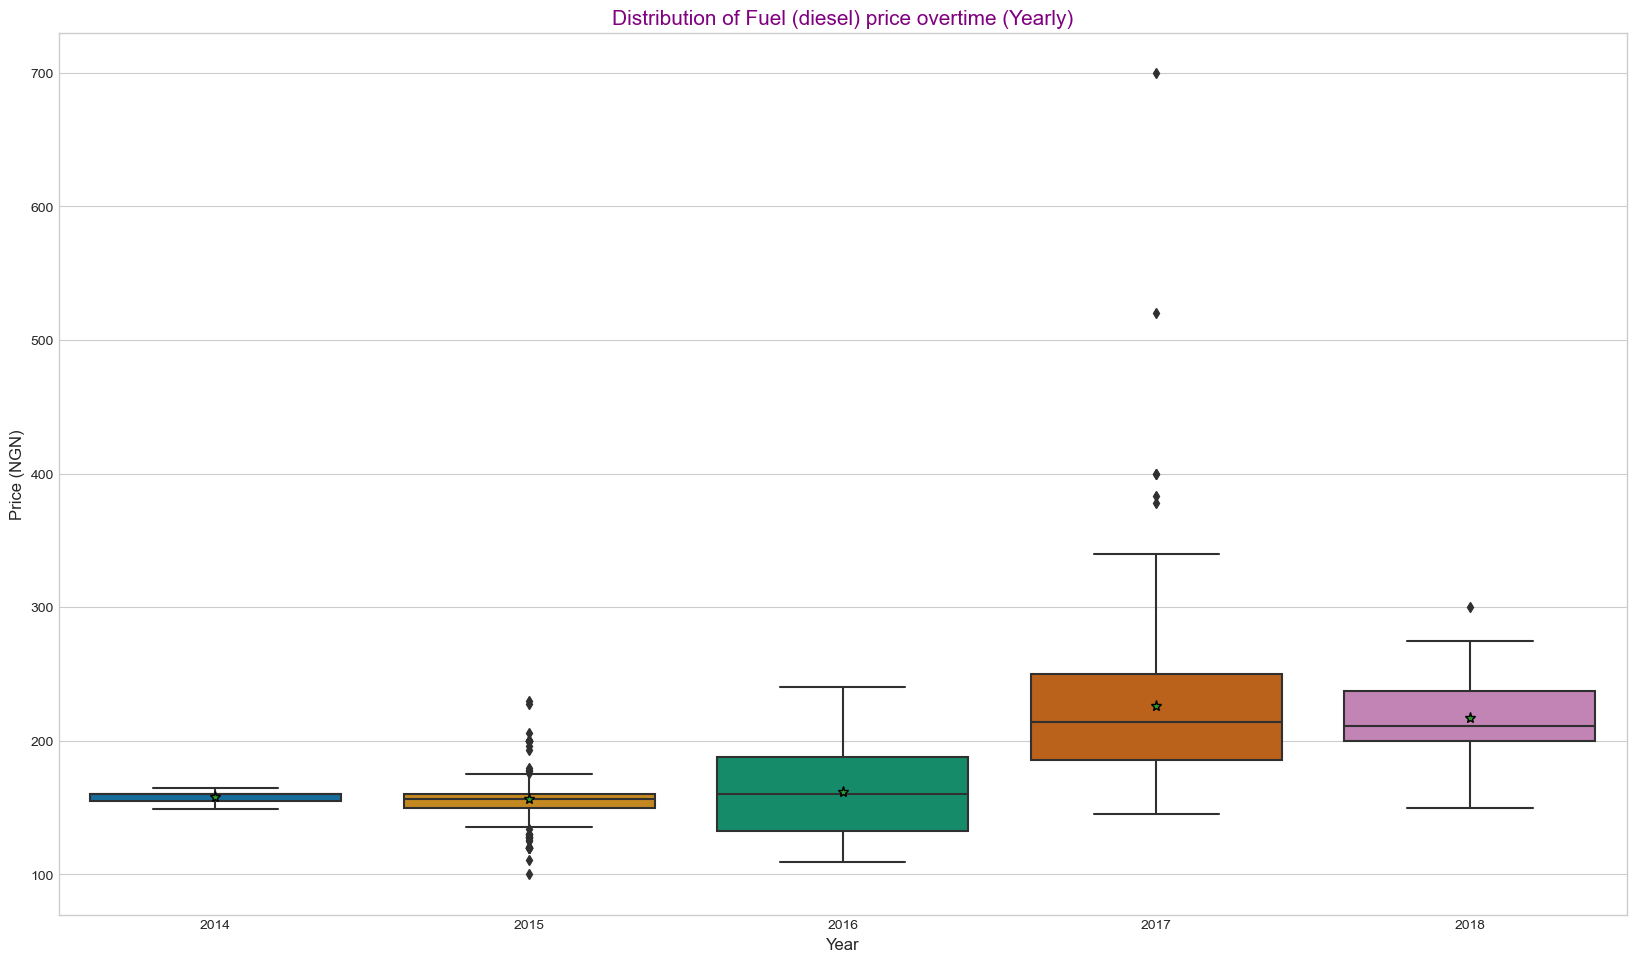

In [1340]:
# Note - The marker in the diagram (Distribution of Fuel (diesel) price overtime (Yearly)) represent the average price mark


plt.figure(figsize=(16, 9))
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')

sns.boxplot(data = df_fuel_diesel, x = df_fuel_diesel['date'].dt.year, y='price', palette = 'colorblind', showmeans = True,
           meanprops={"marker": "*", "markeredgecolor": "black", "markersize": "8"})

plt.title('Distribution of Fuel (diesel) price overtime (Yearly)', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.show()

In [1341]:
# Facts about Fuel (diesel)
# Note - Fuel (diesel) traded mostly during the years 2015, 2016 and 2017

No_of_fdtrades_yearly = df_fuel_diesel.groupby(df_fuel_diesel['date'].dt.year)['commodity'].value_counts().unstack()
No_of_fdtrades_yearly

commodity,Fuel (diesel)
date,
2014,73
2015,176
2016,179
2017,167
2018,70


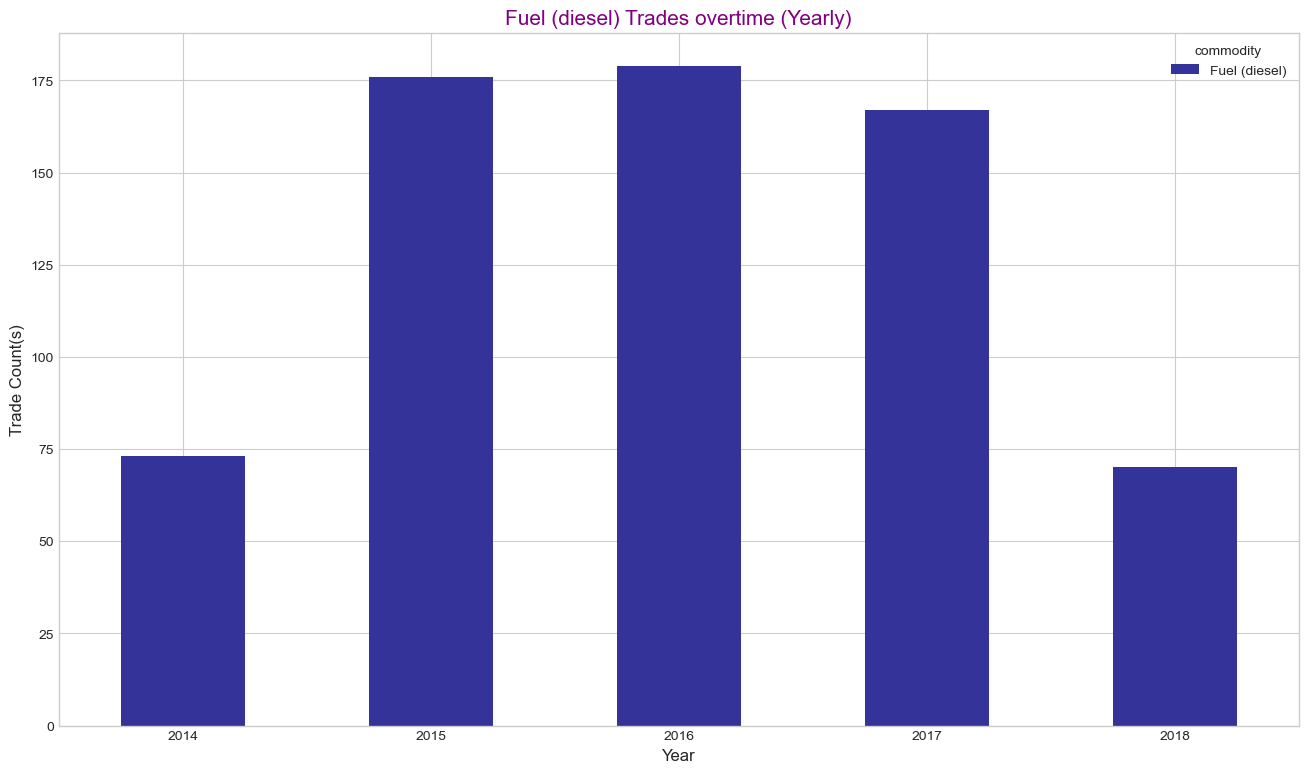

In [1342]:
# Facts about Fuel (diesel)
# Note - The rise of Fuel (diesel) trades increased above 150 in 2015 - 2017
#        In 2014 and 2018, below 75 trades were recorded. 

No_of_fdtrades_yearly.plot(kind = 'bar',
                         figsize=(16, 9),
                         colormap = 'terrain')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Trade Count(s)', fontsize = 12)
plt.xticks(rotation = 360)
plt.title('Fuel (diesel) Trades overtime (Yearly)', fontsize = 15, color = 'purple')
plt.show()

##### Are there any noticeable trends in the price data (over time) for Fuel (diesel)?

###### Answer 
###### * Over time according to the diagram below, the price range of Fuel (diesel) is above 150 naira (NGN) mostly

###### * The Average price of Fuel (diesel) between 2016 and early 2017 saw a sharp increase.

###### * The highest average price was recorded in 2017 despite being positively skewed (that is the likeliness of purchasing fuel (diesel) at a price below average price in the year is high)

###### * There was a slight stable average price range between the year 2014 to early 2016 (Average price range was 155 naira to 162 naira)

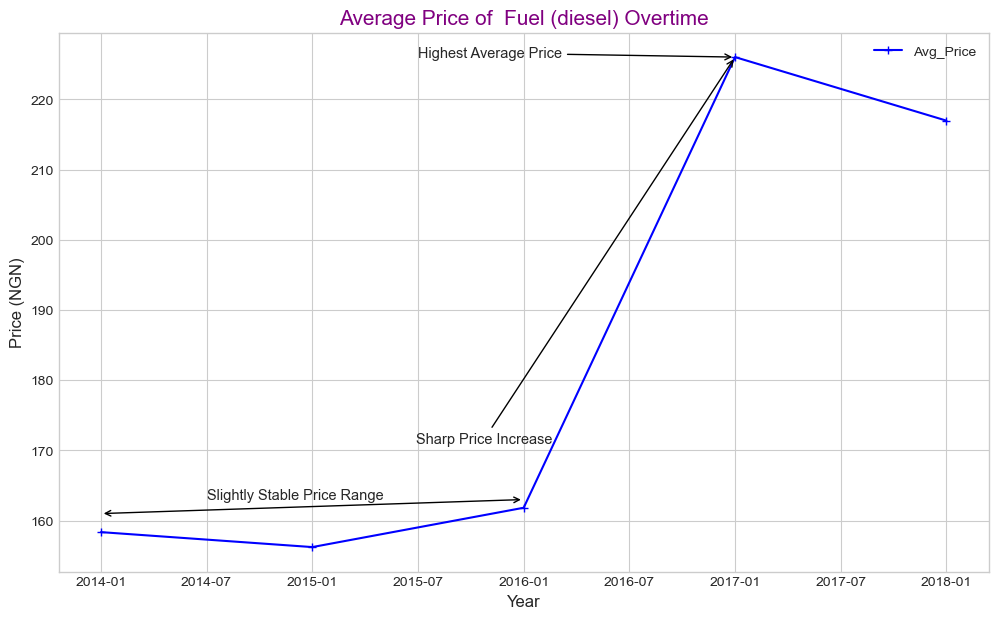

In [1343]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
plt.plot(Avg_p_fdiesel, marker='+', color='b', label='Avg_Price')

plt.annotate('Sharp Price Increase', 
             xy=(2017, 226.01), 
             xytext=(2015.49, 171),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Slightly Stable Price Range', 
             xy=(2016, 164), 
             xytext=(2014.5, 163), fontsize = 10.5)

plt.annotate('', 
             xy=(2016, 163), 
             xytext=(2014, 161),
             arrowprops=dict(arrowstyle='<->', color='black'))

plt.annotate('Highest Average Price', 
             xy=(2017, 226.01), 
             xytext=(2015.5, 226.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.title('Average Price of  Fuel (diesel) Overtime', fontsize = 15, color = 'purple')
plt.xticks([2014.0, 2014.5, 2015.0, 2015.5, 2016.0, 2016.5, 2017.0, 2017.5, 2018.0],
          labels = ['2014-01', '2014-07', '2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.legend()
plt.show()

In [1344]:
# Facts about Fuel (diesel)
# Proof that Over time according to the diagram above, the price range of Fuel (diesel) is above 150 naira (NGN) mostly ##PROOF

# Price above 150 naira (NGN) count. (551 occasions of price above 150)

df_fuel_diesel[df_fuel_diesel['price'] >= 150]['price'].count()

551

In [1345]:
# Price below 150 naira (NGN) count. (114 occasions of price below 150)

df_fuel_diesel[df_fuel_diesel['price'] < 150]['price'].count()

114

##### How does Fuel (diesel) prices vary across different markets?

In [1346]:
# There are 16 unique markets that sells Fuel (diesel)

df_fuel_diesel['market_name'].nunique()

16

In [1347]:
# Facts about Fuel (diesel)
# All markets that sells fuel

# Note - There are 16 markets that supply Fuel (diesel), they are  
#        Ibadan, Aba, Kaura Namoda, Lagos, Gujungu, Gwandu,
#       Giwa, Dandume, Dawanau, Maiduguri, Saminaka, Gombe,
#       Mubi, Damaturu, Biu, and Potiskum.

df_fuel_diesel['market_name'].unique()

array(['Ibadan', 'Aba', 'Kaura Namoda', 'Lagos', 'Gujungu', 'Gwandu',
       'Giwa', 'Dandume', 'Dawanau', 'Maiduguri', 'Saminaka', 'Gombe',
       'Mubi', 'Damaturu', 'Biu', 'Potiskum'], dtype=object)

In [1348]:
# Markets that supplies the most Fuel (diesel)
# 7 markets supplied 47 times overtime.

df_fuel_diesel['market_name'].value_counts()

Ibadan          47
Kaura Namoda    47
Gujungu         47
Gwandu          47
Maiduguri       47
Saminaka        47
Gombe           47
Dawanau         46
Dandume         44
Giwa            40
Biu             39
Damaturu        38
Aba             36
Mubi            34
Potiskum        30
Lagos           29
Name: market_name, dtype: int64

In [1349]:
# Average price of Fuel (diesel) across all 16 markets (overtime)

Avg_mkt_fd = df_fuel_diesel.groupby('market_name')['price'].mean().round(2).sort_values(ascending = False)
Avg_mkt_fd

market_name
Potiskum        231.74
Gujungu         217.85
Mubi            192.22
Damaturu        190.79
Biu             185.98
Dawanau         184.39
Gwandu          184.09
Giwa            182.29
Maiduguri       181.29
Ibadan          175.40
Aba             174.14
Kaura Namoda    173.43
Dandume         168.21
Gombe           165.52
Lagos           164.92
Saminaka        152.15
Name: price, dtype: float64

In [1350]:
# Distribution of price of Fuel (diesel) across all 16 markets (Minimum, Average, Middle and Maximum price overtime)

mkt_fd_prange = df_fuel_diesel.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max'])
mkt_fd_prange

,min,mean,median,max
market_name,,,,
Aba,120.00,174.138889,160.000,220.0000
Biu,100.00,185.976513,200.000,249.0000
Damaturu,109.25,190.790795,203.000,274.6667
Dandume,110.00,168.209545,165.000,232.5000
Dawanau,133.75,184.391304,194.375,246.2500
Giwa,146.25,182.288750,160.000,260.0000
Gombe,125.00,165.520851,155.000,220.0000
Gujungu,120.00,217.851064,160.000,700.0000
Gwandu,127.50,184.093617,165.000,281.0000


###### Answer

###### * According to the data above `(mkt_fd_prange)`, all the market average price of Fuel (diesel) is above 150 naira (NGN)

###### * 2 (Potiskum and Gujungu) out of 16 market places has above 200 naira (NGN) average price, despite this, they are still positively skewed, Which means probablity of getting Fuel (diesel) below average price in this 2 markets is high

###### * Overtime, price has been stable between 14 markets (because average price ranges from 150 naira (NGN) to 200 naira (NGN) mostly except for the 2 markets mentioned above

###### * Only 4 (Biu, Damaturu, Dawanau and Mubi market) out of 16 markets have negatively skewed price distribution, the rest have positively skewed price distribution. Which means probablity of getting Fuel (diesel) above average price in this 4 markets is high `(Fuel (diesel) is expensive in this 4 markets)` and `(Fuel (diesel) is cheaper in the remaining 12 markets)` `(Check - mkt_fd_prange)`

In [1351]:
# Market order interms of increasing average price of Fuel (diesel) 

fd_mktorder = df_fuel_diesel.groupby("market_name")["price"].mean().sort_values().index
fd_mktorder

Index(['Saminaka', 'Lagos', 'Gombe', 'Dandume', 'Kaura Namoda', 'Aba',
       'Ibadan', 'Maiduguri', 'Giwa', 'Gwandu', 'Dawanau', 'Biu', 'Damaturu',
       'Mubi', 'Gujungu', 'Potiskum'],
      dtype='object', name='market_name')

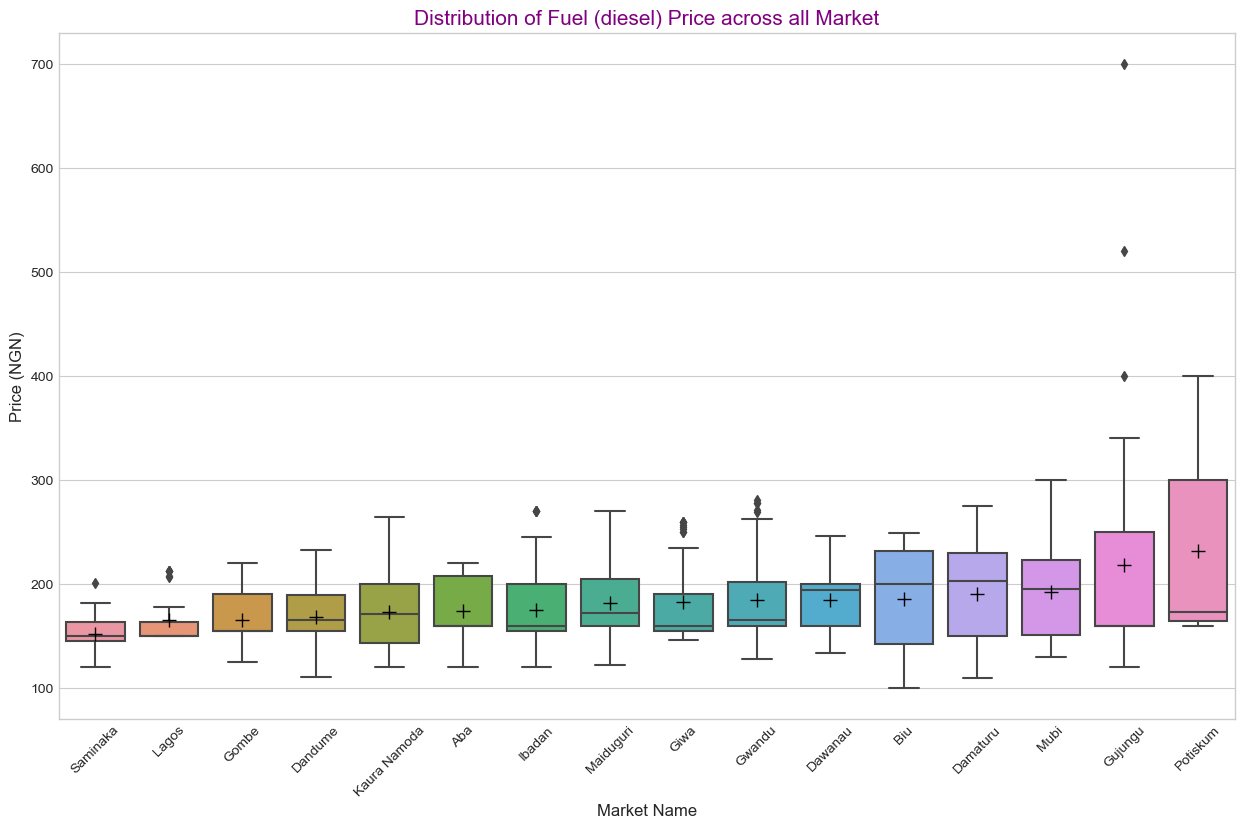

In [1448]:
# Note - The marker in the diagram (Distribution of Fuel (diesel) Price across all Market) represent the average price mark


plt.style.use('_mpl-gallery')
plt.figure(figsize=(12, 7))

sns.boxplot(data = df_fuel_diesel, x = 'market_name', y = 'price', showmeans = True, order = fd_mktorder,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xticks(rotation = 45)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.xlabel('Market Name', fontsize = 12)
plt.title('Distribution of Fuel (diesel) Price across all Market', fontsize = 15, color = 'purple')
plt.show()

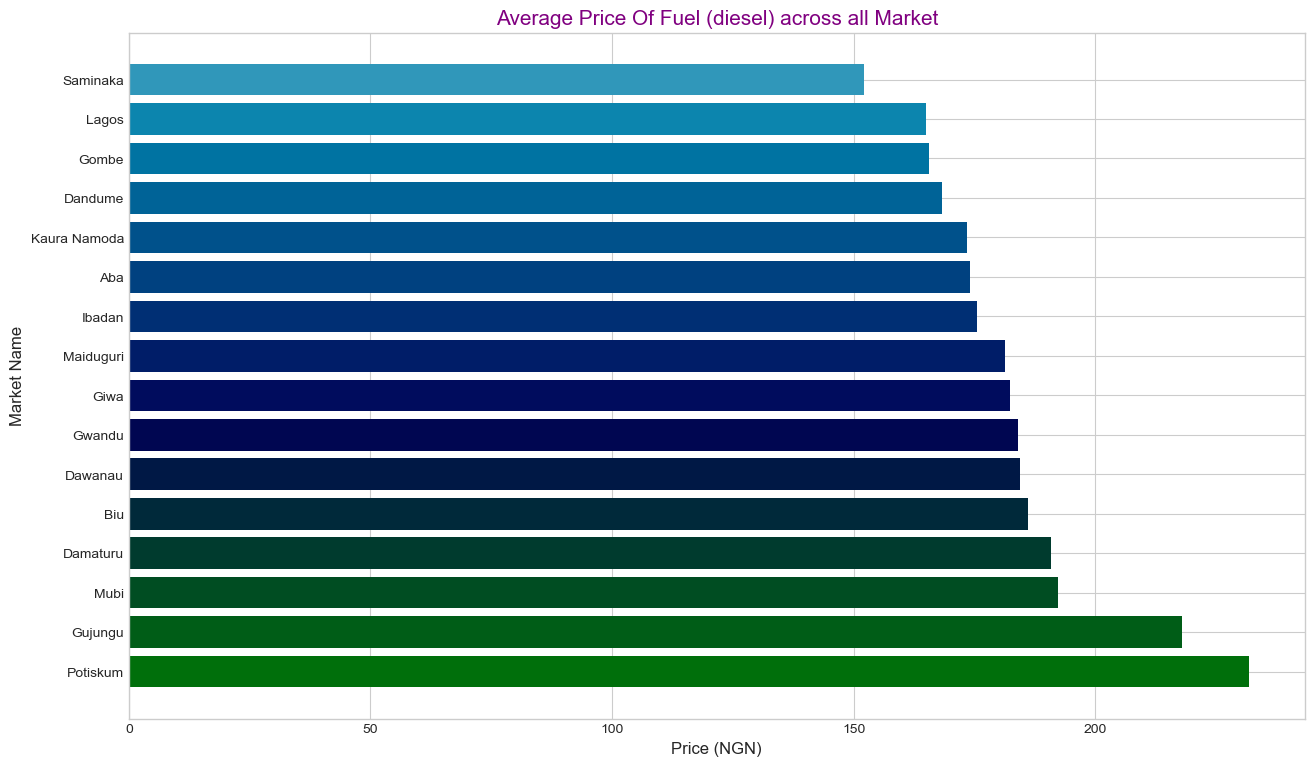

In [1419]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(12, 7))
plt.barh(Avg_mkt_fd.index, Avg_mkt_fd, color=sns.color_palette('ocean', len(Avg_mkt_p)))
plt.xlabel('Price (NGN)', fontsize = 12)
plt.ylabel('Market Name', fontsize = 12)
plt.title('Average Price Of Fuel (diesel) across all Market', fontsize = 15, color = 'purple')
plt.show()

In [1353]:
# According to data, this 2 markets contain high prices values

# Note - Gujungu market is also one of the top suppliers of Fuel (diesel) overtime

# Note - In the 2nd, 3rd and 4th month of 2017, the price of Fuel was 520 naira (NGN), 700 naira (NGN) and 400 naira (NGN) at Gujungu market,
#       these are few of the highest prices recording in that period (2017), which is why the highest average price overtime
#       was found in this period.

df_fuel_diesel.loc[df_fuel_diesel['market_name'].isin(['Potiskum', 'Gujungu'])].sort_values('price', ascending = False).head(5)

,date,scale,category,price,state,market_name,commodity,enterprise
3176,2017-03-15,L,non-food,700.0,Jigawa,Gujungu,Fuel (diesel),Retail
3175,2017-02-15,L,non-food,520.0,Jigawa,Gujungu,Fuel (diesel),Retail
10746,2017-11-15,L,non-food,400.0,Yobe,Potiskum,Fuel (diesel),Retail
3177,2017-04-15,L,non-food,400.0,Jigawa,Gujungu,Fuel (diesel),Retail
10745,2017-10-15,L,non-food,383.0,Yobe,Potiskum,Fuel (diesel),Retail


##### Are there any states where Fuel (diesel) is consistently cheaper or expensive?

###### Answer

###### * Adamawa and Kano state are the only states that have a negatively skewed fuel (diesel) price distribution, that means probablity of getting Fuel (diesel) above average price in this states is high `(fuel (diesel) is more expensive in this 2 states)` `(Check - (fd_s_prange))`

###### * The remaining 11 states have positively skewed fuel (diesel) price distribution `(Check - (fd_s_prange))` `(fuel (diesel) is cheaper in this 11 states)`

###### * Jigawa has the highest recorded price in history

###### * Borno has the lowest price recorded in history

In [1473]:
# Distribution of price of  Fuel (diesel) across all 13 states (Minimum, Average, Middle and Maximum price overtime)


fd_s_prange = df_fuel_diesel.groupby('state')['price'].agg(['min', 'mean', 'median', 'max'])
fd_s_prange

,min,mean,median,max
state,,,,
Abia,120.00,174.138889,160.000,220.00
Adamawa,130.00,192.225000,194.750,300.00
Borno,100.00,183.413767,177.798,270.00
Gombe,125.00,165.520851,155.000,220.00
Jigawa,120.00,217.851064,160.000,700.00
Kaduna,120.00,166.009195,157.800,260.00
Kano,133.75,184.391304,194.375,246.25
Katsina,110.00,168.209545,165.000,232.50
Kebbi,127.50,184.093617,165.000,281.00


In [1482]:
# State order interms of increasing average price of  Fuel (diesel)

s_fdorder = df_fuel_diesel.groupby("state")["price"].mean().sort_values().index
s_fdorder

Index(['Lagos', 'Gombe', 'Kaduna', 'Katsina', 'Zamfara', 'Abia', 'Oyo',
       'Borno', 'Kebbi', 'Kano', 'Adamawa', 'Yobe', 'Jigawa'],
      dtype='object', name='state')

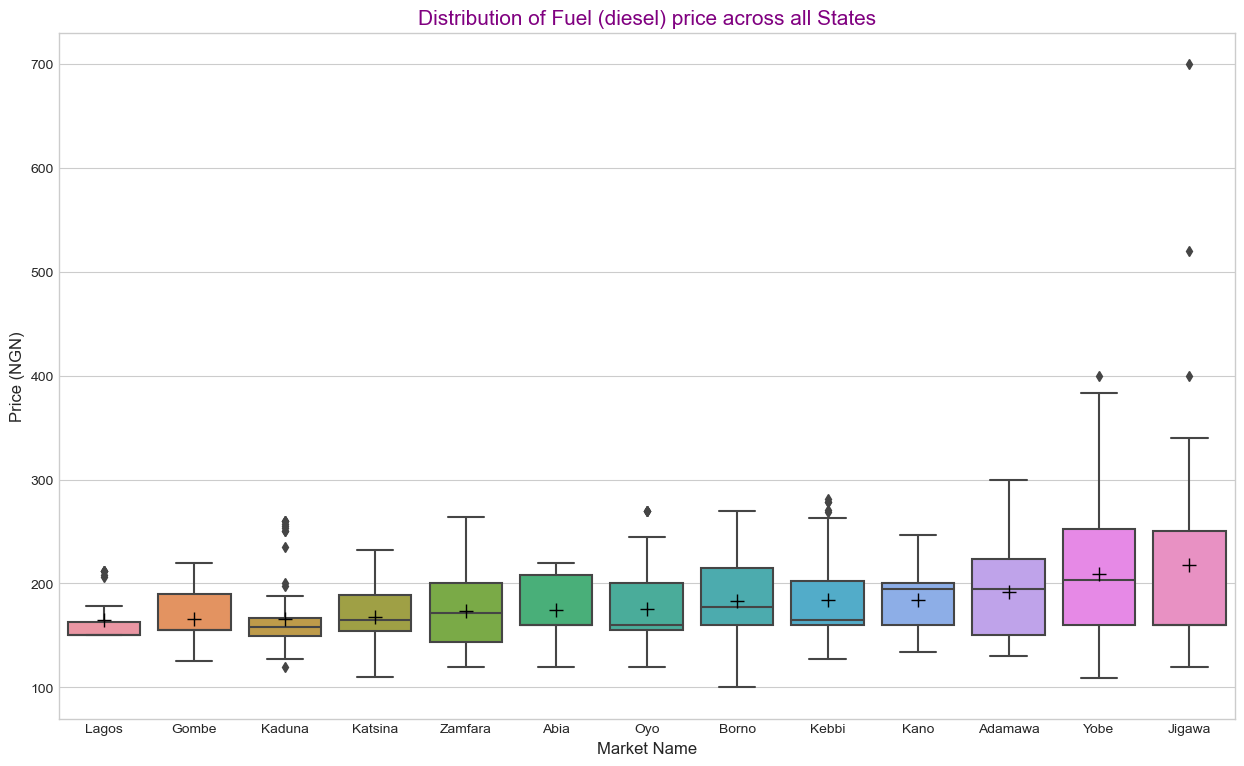

In [1483]:
# Note - The marker in the diagram (Distribution of Fuel (diesel) price across all States) represent the average price mark


plt.figure(figsize=(12, 7))
sns.boxplot(data = df_fuel_diesel, x = 'state', y = 'price', order = s_fdorder, showmeans = True,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xlabel('Market Name', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.title('Distribution of Fuel (diesel) price across all States', fontsize = 15, color = 'purple')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Ci Commodity 3 `(oil and fats - (Oil (palm)))`

##### Checking the oil and fats (Oil (palm)) prices over time and other facts (Notes)

In [1354]:
# Commodity 3 (Oil (palm))

df_oil_palm = cmds[cmds['commodity'] == 'Oil (palm)']
df_oil_palm = df_oil_palm.sort_values('date')
df_oil_palm.head()

,date,scale,category,price,state,market_name,commodity,enterprise
9021,2014-05-15,L,oil and fats,240.00,Oyo,Ibadan,Oil (palm),Retail
7456,2014-07-15,L,oil and fats,5600.00,Kebbi,Gwandu,Oil (palm),Wholesale
8254,2014-07-15,L,oil and fats,6200.00,Lagos,Lagos,Oil (palm),Wholesale
11111,2014-07-15,L,oil and fats,6500.00,Gombe,Gombe,Oil (palm),Wholesale
2771,2014-07-15,L,oil and fats,266.66,Jigawa,Gujungu,Oil (palm),Retail


In [1355]:
# Facts about Oil (palm)
# Note - It is measured per litre and per 100 KG.

df_oil_palm['scale'].value_counts()

L         605
100 KG     63
Name: scale, dtype: int64

In [1356]:
# Facts about Oil (palm)
# Note - Most enterprises of Oil (palm) are wholesalers (529)

df_oil_palm['enterprise'].value_counts()

Wholesale    529
Retail       139
Name: enterprise, dtype: int64

In [1357]:
# Facts about Oil (palm)
# Note - All states that supply Oil (palm) are 13.
#       Oyo, Kebbi, Lagos, Gombe, Jigawa, Kano, Katsina, Kaduna,
#       Borno, Zamfara, Abia, Yobe and Adamawa.

df_oil_palm['state'].unique()

array(['Oyo', 'Kebbi', 'Lagos', 'Gombe', 'Jigawa', 'Kano', 'Katsina',
       'Kaduna', 'Borno', 'Zamfara', 'Abia', 'Yobe', 'Adamawa'],
      dtype=object)

In [1358]:
# Facts about Oil (palm)
# Note - Top 4 states supplying Oil (palm)
#         Kaduna, Borno, Yobe, Oyo

df_oil_palm['state'].value_counts().head(4)

Kaduna    87
Borno     86
Yobe      61
Oyo       48
Name: state, dtype: int64

In [1359]:
# Facts about Oil (palm)
# Note - List of all markets supplying Oil (palm) (16)

df_oil_palm['market_name'].unique()

array(['Ibadan', 'Gwandu', 'Lagos', 'Gombe', 'Gujungu', 'Dawanau',
       'Dandume', 'Saminaka', 'Giwa', 'Maiduguri', 'Kaura Namoda', 'Aba',
       'Damaturu', 'Mubi', 'Biu', 'Potiskum'], dtype=object)

In [1360]:
# Facts about Oil (palm)
# To find Average price of Oil (palm) over the years...
# Note 1 KG = 1 L
# We need to find the price for 1 L over time since our dataset contains..
# scale in L and 100KG, we can find the Oil (palm) price in L overtime by..
# converting all Oil (palm) scale to 1 L and price/100 where scale is 100 KG

# Create a copy of Oil (palm) dataframe (df_oil_palm)

df_oil_palm2 = df_oil_palm.copy()
df_oil_palm2.head()

,date,scale,category,price,state,market_name,commodity,enterprise
9021,2014-05-15,L,oil and fats,240.00,Oyo,Ibadan,Oil (palm),Retail
7456,2014-07-15,L,oil and fats,5600.00,Kebbi,Gwandu,Oil (palm),Wholesale
8254,2014-07-15,L,oil and fats,6200.00,Lagos,Lagos,Oil (palm),Wholesale
11111,2014-07-15,L,oil and fats,6500.00,Gombe,Gombe,Oil (palm),Wholesale
2771,2014-07-15,L,oil and fats,266.66,Jigawa,Gujungu,Oil (palm),Retail


In [1361]:
# Write a function to update scale and price in our new Oil (palm) dataframe (the copy/duplicate) 
# Which means change all the scale of Oil (palm) to 'L' and price/100 where scale = '100 KG'

def update_scale_and_price2(dataframe):
    mask = dataframe['scale'] == '100 KG'
    dataframe.loc[mask, 'price'] = dataframe.loc[mask, 'price'] / 100
    dataframe.loc[mask, 'scale'] = 'L'
    dataframe['price'] = dataframe['price'].round(2)
    
    return dataframe

updated_df_oil_palm = update_scale_and_price2(df_oil_palm2)
updated_df_oil_palm

,date,scale,category,price,state,market_name,commodity,enterprise
9021,2014-05-15,L,oil and fats,240.00,Oyo,Ibadan,Oil (palm),Retail
7456,2014-07-15,L,oil and fats,5600.00,Kebbi,Gwandu,Oil (palm),Wholesale
8254,2014-07-15,L,oil and fats,6200.00,Lagos,Lagos,Oil (palm),Wholesale
11111,2014-07-15,L,oil and fats,6500.00,Gombe,Gombe,Oil (palm),Wholesale
2771,2014-07-15,L,oil and fats,266.66,Jigawa,Gujungu,Oil (palm),Retail
...,...,...,...,...,...,...,...,...
11156,2018-05-15,L,oil and fats,392.00,Gombe,Gombe,Oil (palm),Wholesale
4176,2018-05-15,L,oil and fats,368.53,Kaduna,Saminaka,Oil (palm),Wholesale
3525,2018-05-15,L,oil and fats,345.33,Kaduna,Giwa,Oil (palm),Wholesale
7496,2018-05-15,L,oil and fats,338.67,Kebbi,Gwandu,Oil (palm),Wholesale


In [1362]:
# Facts about Oil (palm)
# Since the scale of the Oil (palm) dataset has been updated (all in L), we can now find the maximum and minimum price overtime.

# Note - The minimum price of Oil (palm) overtime is 3.66 naira (ngn) per L

updated_df_oil_palm['price'].min()

3.66

In [1363]:
# Facts about Oil (palm)
# Note - The maximum price of Oil (palm) overtime is 19375 naira (ngn) per L

updated_df_oil_palm['price'].max()

19375.0

In [1364]:
# Facts about Oil (palm)
# To find Average price of Oil (palm) over the years...

Avg_p_op = updated_df_oil_palm.groupby(updated_df_oil_palm['date'].dt.year)['price'].mean().round(2)
Avg_p_op

date
2014    3448.03
2015    2694.84
2016    3751.21
2017     901.30
2018     431.24
Name: price, dtype: float64

###### Answer 

######          * The highest price of Oil (palm) was recorded in 2016. `(Check - Distribution of Oil (palm) price overtime (Yearly) image below)`

###### - In 2015, 2017, and 2018, there were price irregularities (Outiliers), this occurs when the Oil (palm) price is far greater or lesser than the average Oil (palm) price of the year `(Check - Distribution of Oil (palm) price overtime (Yearly) image below)`

######          * The price of Oil (palm) has mostly being below 7500 naira (NGN) overtime. `(Check - Distribution of Oil (palm) price overtime (Yearly) image below)`

######          * The number of Oil (palm) trades in 2015 to 2017 was above 150 and below 75 in 2014 and 2018. `(Check - Oil (palm) Trades overtime (Yearly) image below)`

######          * In 2014, the oil (palm) price distribution is negatively skewed, which means probability of getting oil (palm) at a price above the average price is high (Price was expensive during this period) `(Check - oilp_prange)`

######          * Unlike the rest of the following years (2015, 2016, 2017, 2018) where price distribution is positively skewed. `(Check - oilp_prange)`

In [1402]:
# Distribution of price of Oil (palm) yearly (Minimum, Average, Middle and Maximum price)

oilp_prange = updated_df_oil_palm.groupby(updated_df_oil_palm['date'].dt.year)['price'].agg(['min', 'mean', 'median', 'max'])
oilp_prange

,min,mean,median,max
date,,,,
2014,196.00,3448.027123,4000.000,13333.33
2015,51.25,2694.843559,1220.000,7340.00
2016,18.85,3751.213955,1500.000,19375.00
2017,7.52,901.295556,466.000,16500.00
2018,3.66,431.241714,418.335,613.87


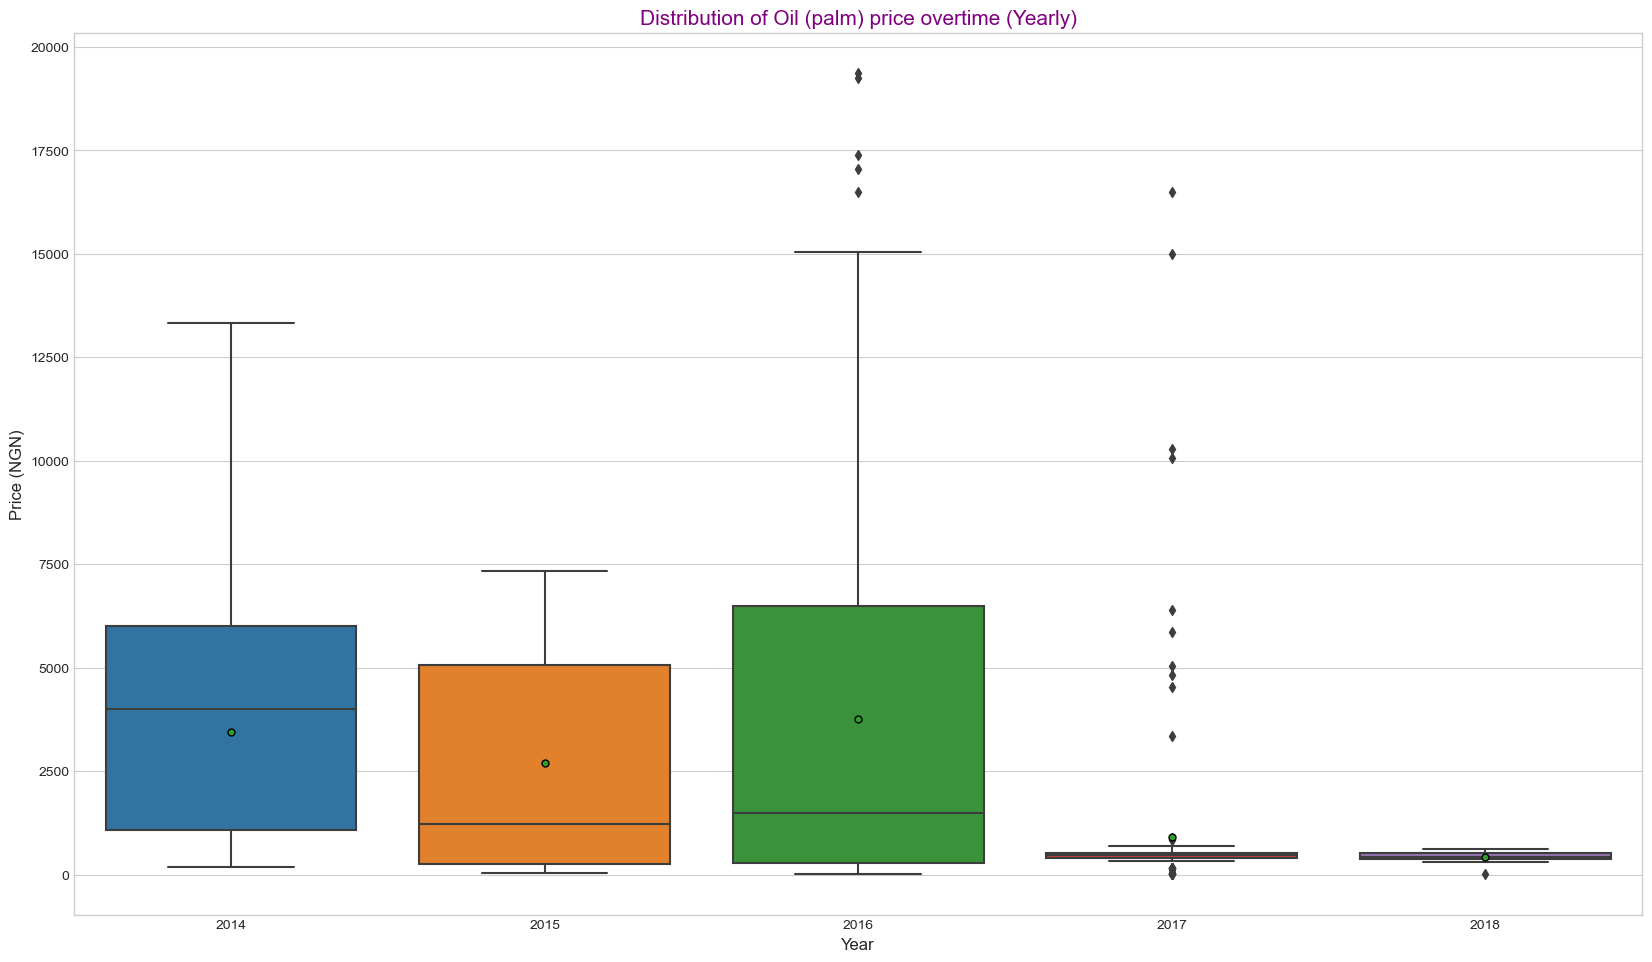

In [1403]:
# Note - The marker in the diagram (Distribution of Oil (palm) price overtime (Yearly)) represent the average price mark


plt.figure(figsize=(16, 9))
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')

sns.boxplot(data = updated_df_oil_palm, x = updated_df_oil_palm['date'].dt.year, y='price', showmeans = True,
           meanprops={"marker": "o", "markeredgecolor": "black", "markersize": "5"})

plt.title('Distribution of Oil (palm) price overtime (Yearly)', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.show()

In [1366]:
# Facts about Oil (palm)
# Note - Oil (palm) traded mostly during the years 2015, 2016 and 2017

No_of_optrades_yearly = updated_df_oil_palm.groupby(updated_df_oil_palm['date'].dt.year)['commodity'].value_counts().unstack()
No_of_optrades_yearly

commodity,Oil (palm)
date,
2014,73
2015,177
2016,177
2017,171
2018,70


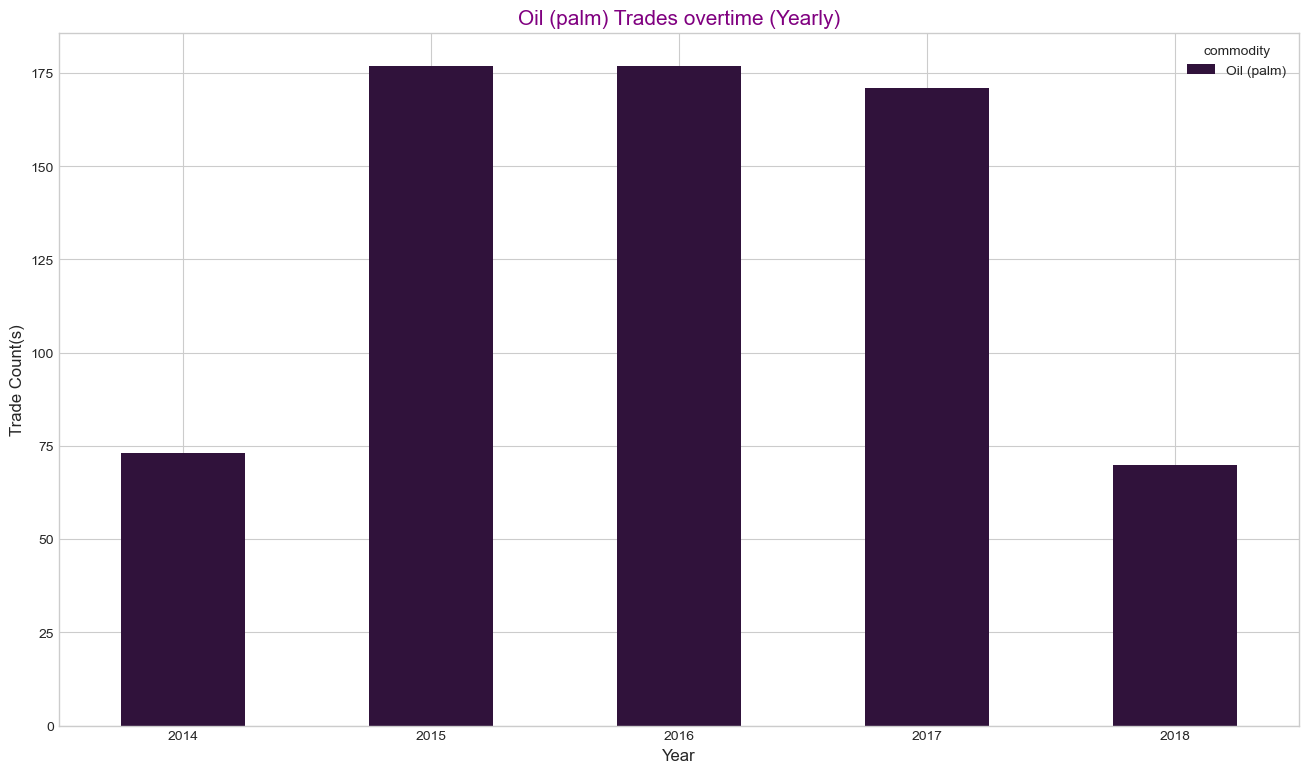

In [1367]:
# Facts about Oil (palm)
# Note - The rise of Oil (palm) trades increased above 150 in 2015 to 2017
#        In 2014 and 2018, Oil (palm) tardes were below 75. 

No_of_optrades_yearly.plot(kind = 'bar',
                         figsize=(16, 9),
                         colormap = 'turbo')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Trade Count(s)', fontsize = 12)
plt.xticks(rotation = 360)
plt.title('Oil (palm) Trades overtime (Yearly)', fontsize = 15, color = 'purple')
plt.show()

##### Are there any noticeable trends in the price data (over time) for oil and fats (Oil (palm))?

###### Answer

###### * There was a sharp decline in price from 2016 to 2018 (from above 2500 naira (NGN) before 2016 to below 2500 naira (NGN) per litre after 2016).

###### * The highest average price of Oil (palm) was in 2016, this is due to high prices during this period

###### * The lowest average price of Oil (palm) was in 2018, this is due to low prices during this period

###### * Despite the high trading volume in 2017, the average price of Oil (palm) was low.

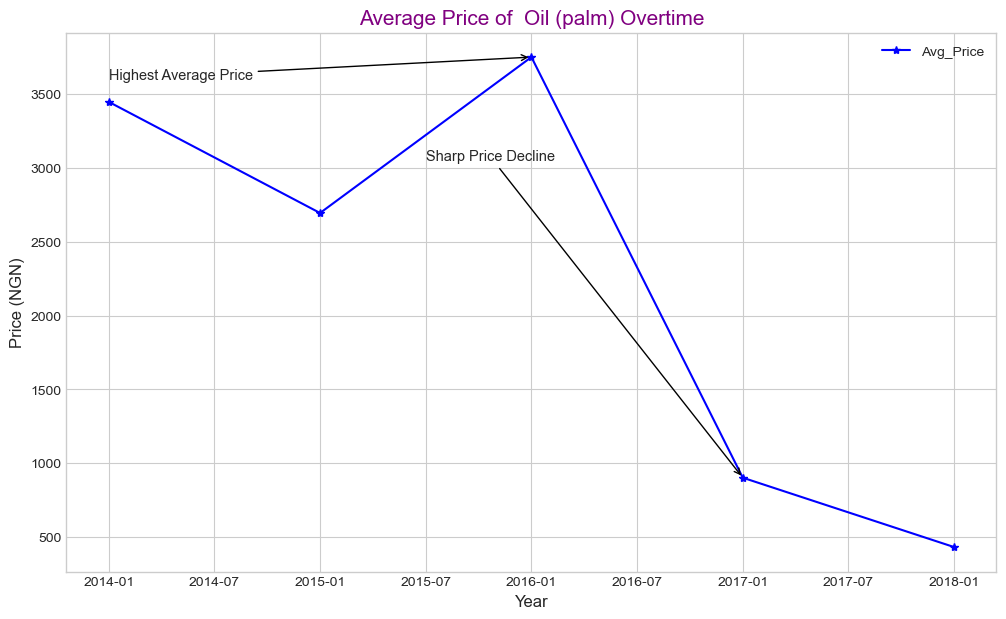

In [1368]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
plt.plot(Avg_p_op, marker='*', color='b', label='Avg_Price')

plt.annotate('Sharp Price Decline', 
             xy=(2017, 901.30), 
             xytext=(2015.5, 3050),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.annotate('Highest Average Price', 
             xy=(2016, 3751.21), 
             xytext=(2014, 3600),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.xticks([2014.0, 2014.5, 2015.0, 2015.5, 2016.0, 2016.5, 2017.0, 2017.5, 2018.0],
          labels = ['2014-01', '2014-07', '2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01'])
plt.title('Average Price of  Oil (palm) Overtime', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.legend()
plt.show()

##### How does oil and fats - (Oil (palm)) prices vary across different markets?

In [1369]:
# There are 16 unique markets that sells Oil (palm)

updated_df_oil_palm['market_name'].nunique()

16

In [1370]:
# Facts about Oil (palm)
# All markets that sells Oil (palm)

# Note - There are 16 markets that supply Oil (palm), they are  
#        Ibadan, Gwandu, Lagos, Gombe, Gujungu, Dawanau,
#       Dandume, Saminaka, Giwa, Maiduguri, Kaura Namoda, Aba,
#       Damaturu, Mubi, Biu, and Potiskum.

updated_df_oil_palm['market_name'].unique()

array(['Ibadan', 'Gwandu', 'Lagos', 'Gombe', 'Gujungu', 'Dawanau',
       'Dandume', 'Saminaka', 'Giwa', 'Maiduguri', 'Kaura Namoda', 'Aba',
       'Damaturu', 'Mubi', 'Biu', 'Potiskum'], dtype=object)

In [1371]:
# Markets that supplies the most Oil (palm)
# 1 market (ibadan), supplied 48 times overtime, while 7 other markets supplied 47 times overtime.

updated_df_oil_palm['market_name'].value_counts()

Ibadan          48
Gwandu          47
Lagos           47
Gombe           47
Gujungu         47
Saminaka        47
Maiduguri       47
Kaura Namoda    47
Dandume         44
Giwa            40
Damaturu        39
Biu             39
Aba             38
Dawanau         35
Mubi            34
Potiskum        22
Name: market_name, dtype: int64

In [1372]:
# Average price of Oil (palm) across all 16 markets (overtime)

Avg_mkt_op = updated_df_oil_palm.groupby('market_name')['price'].mean().round(2).sort_values(ascending = False)
Avg_mkt_op

market_name
Maiduguri       5981.07
Gwandu          4925.44
Gombe           4674.28
Aba             3915.18
Lagos           3867.48
Dawanau         3581.59
Gujungu         2708.29
Giwa            1241.27
Dandume         1166.73
Kaura Namoda    1089.52
Saminaka         899.80
Ibadan           665.50
Potiskum         412.11
Biu              259.38
Damaturu         259.32
Mubi             169.18
Name: price, dtype: float64

In [1410]:
# Distribution of price of Oil (palm) across all 16 markets (Minimum, Average, Middle and Maximum price overtime)

mkt_op_prange = updated_df_oil_palm.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max'])
mkt_op_prange

,min,mean,median,max
market_name,,,,
Aba,203.33,3915.182632,4000.000,16500.00
Biu,41.50,259.381538,121.200,640.00
Damaturu,8.80,259.323846,235.260,538.00
Dandume,420.00,1166.727273,1125.000,3340.00
Dawanau,338.00,3581.594286,5060.000,7340.00
Giwa,345.33,1241.269000,1230.000,2810.50
Gombe,380.00,4674.276596,5500.000,19250.00
Gujungu,266.66,2708.286170,383.000,17375.00
Gwandu,338.67,4925.436170,5600.000,14715.00


###### Answer

###### * Despite the fact that ibadan market is the largest supplier overtime, the average price in ibadan market is low overtime (below 1000 naira (NGN))

###### * 6 markets sell below 1000 naira (NGN) per L overtime.

###### * 7 markets sell between 1000 and 4000 naira (NGN) per L overtime.

###### * Only 3 markets (Maiduguri, Gwandu, Gombe) sell above 4000 naira (NGN) per L overtime.

###### * In Aba, Dawanau, Gombe, Gwandu, Kaura Namoda, Lagos, Maiduguri, and Potiskum market, price distribution is negatively skewed. `(oil (palm) is expensive here)` `(Check - mkt_op_prange)`

###### * In Biu, Damaturu, Dandume, Giwa, Gujungu, Ibadan, Mubi, and Saminaka market, price distribution is positively skewed `(oil (palm) is cheaper here)` `(Check - mkt_op_prange)`

In [1411]:
# Market order interms of increasing average price of Oil (palm)

op_mktorder = updated_df_oil_palm.groupby("market_name")["price"].mean().sort_values().index
op_mktorder

Index(['Mubi', 'Damaturu', 'Biu', 'Potiskum', 'Ibadan', 'Saminaka',
       'Kaura Namoda', 'Dandume', 'Giwa', 'Gujungu', 'Dawanau', 'Lagos', 'Aba',
       'Gombe', 'Gwandu', 'Maiduguri'],
      dtype='object', name='market_name')

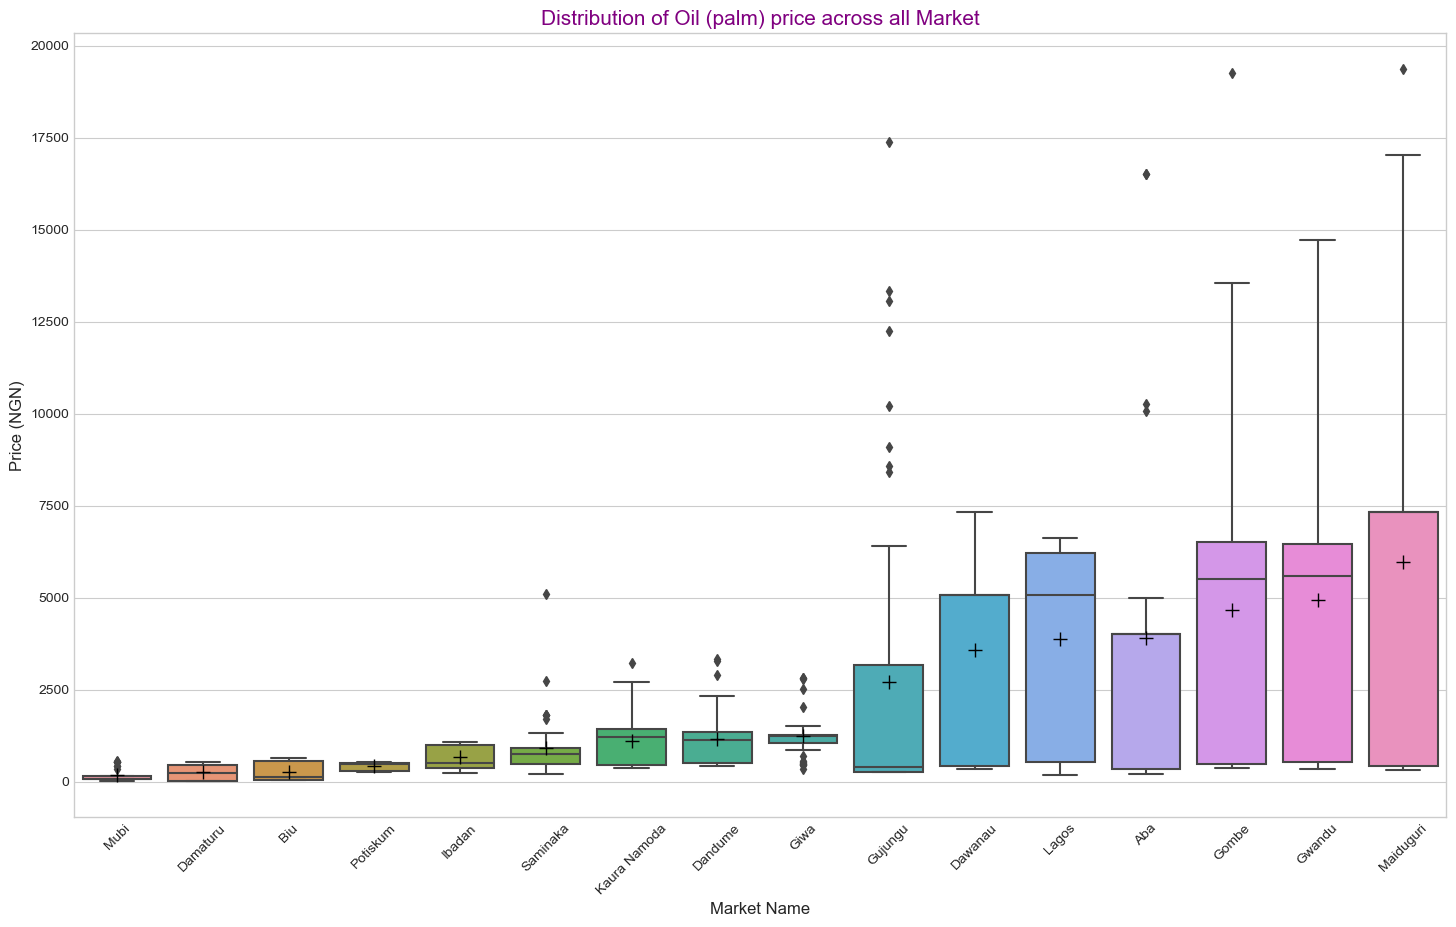

In [1415]:
# Note - The marker in the diagram (Distribution of Oil (palm) Price across all Market) represent the average price mark


plt.style.use('_mpl-gallery')
plt.figure(figsize=(14, 8))

sns.boxplot(data = updated_df_oil_palm, x = 'market_name', y = 'price', showmeans = True, order = op_mktorder,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xticks(rotation = 45)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.xlabel('Market Name', fontsize = 12)
plt.title('Distribution of Oil (palm) price across all Market', fontsize = 15, color = 'purple')
plt.show()

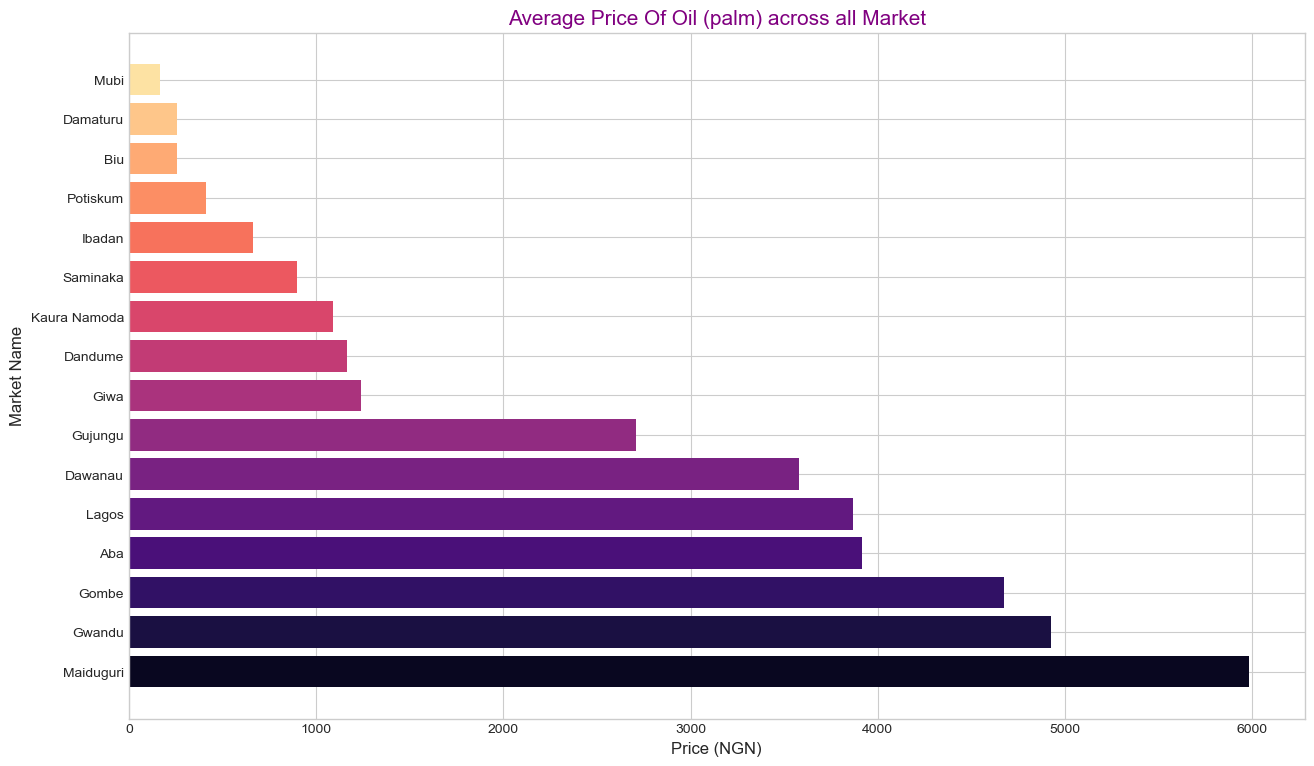

In [1414]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(12, 7))
plt.barh(Avg_mkt_op.index, Avg_mkt_op, color=sns.color_palette('magma', len(Avg_mkt_op)))
plt.xlabel('Price (NGN)', fontsize = 12)
plt.ylabel('Market Name', fontsize = 12)
plt.title('Average Price Of Oil (palm) across all Market', fontsize = 15, color = 'purple')
plt.show()

##### Are there any states where Oil (palm) is consistently cheaper or expensive?

###### Answer

###### * In Abia, Gombe, Kano, Kebbi, Lagos, and Zamfara state, price distribution is negatively skewed. `(Oil (palm) is expensive here)` `(Check - op_s_prange)`

###### * In Adamawa, Borno, Jigawa, Kaduna, Katsina, Oyo, and Yobe state, price distribution is positively skewed. `(Oil (palm) is cheaper here)` `(Check - op_s_prange)`

###### * Borno state recorded the highest price of Oil (palm) in history.

###### * Adamawa state recorded the lowest price of Oil (palm) in history.

In [1469]:
# Distribution of price of  Oil (palm) across all 13 states (Minimum, Average, Middle and Maximum price overtime)


op_s_prange = updated_df_oil_palm.groupby('state')['price'].agg(['min', 'mean', 'median', 'max'])
op_s_prange

,min,mean,median,max
state,,,,
Abia,203.33,3915.182632,4000.000,16500.00
Adamawa,3.66,169.176765,75.000,558.33
Borno,41.50,3386.348256,537.500,19375.00
Gombe,380.00,4674.276596,5500.000,19250.00
Jigawa,266.66,2708.286170,383.000,17375.00
Kaduna,196.00,1056.794598,916.000,5100.00
Kano,338.00,3581.594286,5060.000,7340.00
Katsina,420.00,1166.727273,1125.000,3340.00
Kebbi,338.67,4925.436170,5600.000,14715.00


In [1478]:
# State order interms of increasing average price of  Oil (palm)

s_oporder = updated_df_oil_palm.groupby("state")["price"].mean().sort_values().index
s_oporder

Index(['Adamawa', 'Yobe', 'Oyo', 'Kaduna', 'Zamfara', 'Katsina', 'Jigawa',
       'Borno', 'Kano', 'Lagos', 'Abia', 'Gombe', 'Kebbi'],
      dtype='object', name='state')

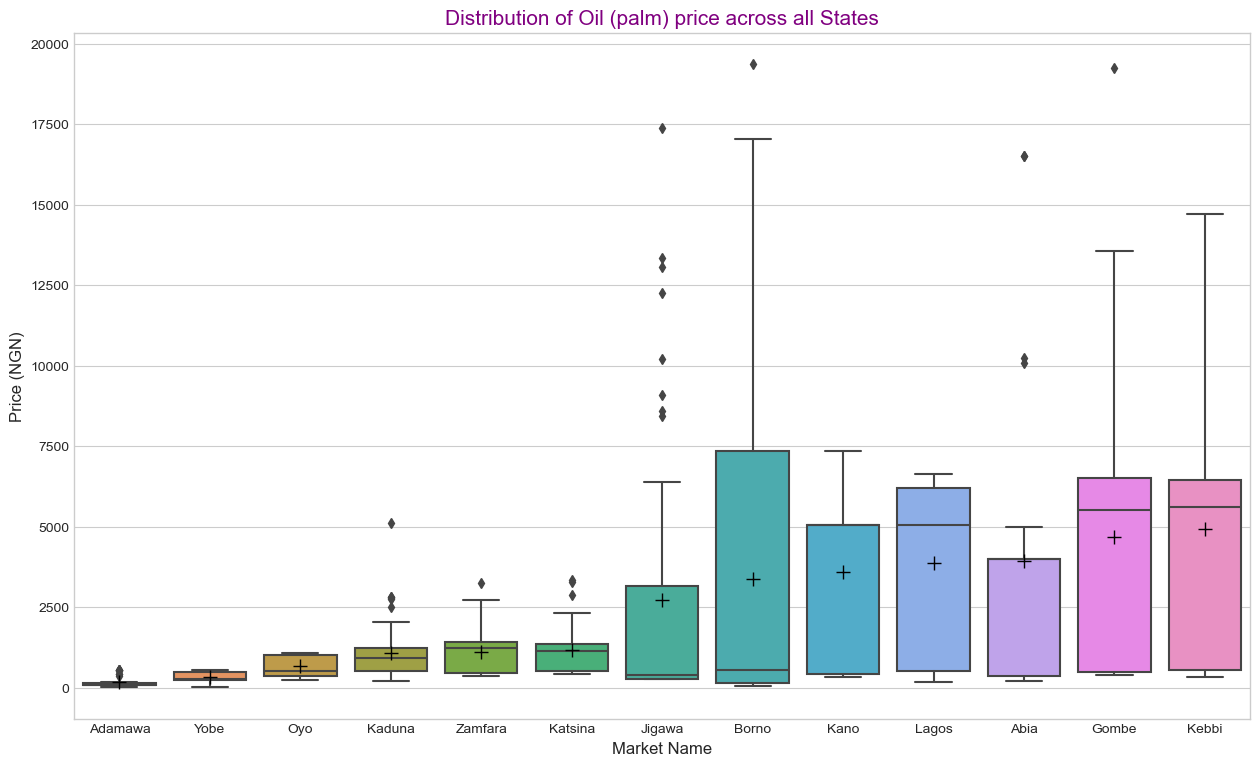

In [1479]:
# Note - The marker in the diagram (Distribution of Oil (palm) price across all States) represent the average price mark


plt.figure(figsize=(12, 7))
sns.boxplot(data = updated_df_oil_palm, x = 'state', y = 'price', order = s_oporder, showmeans = True,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xlabel('Market Name', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.title('Distribution of Oil (palm) price across all States', fontsize = 15, color = 'purple')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Di Commodity 4 `(pulses and nuts (Cowpeas (white)))`

##### Checking the pulses and nuts (Cowpeas (white)) prices over time and other facts (Notes)

In [1374]:
# Commodity 4 (Cowpeas (white))

df_cowpea_w = cmds[cmds['commodity'] == 'Cowpeas (white)']
df_cowpea_w = df_cowpea_w.sort_values('date')
df_cowpea_w.head()

,date,scale,category,price,state,market_name,commodity,enterprise
9544,2014-05-15,KG,pulses and nuts,119.72,Oyo,Ibadan,Cowpeas (white),Retail
2128,2014-07-15,100 KG,pulses and nuts,16250.00,Borno,Maiduguri,Cowpeas (white),Wholesale
7189,2014-07-15,100 KG,pulses and nuts,13100.00,Katsina,Dandume,Cowpeas (white),Wholesale
3238,2014-07-15,100 KG,pulses and nuts,14000.00,Jigawa,Gujungu,Cowpeas (white),Wholesale
11628,2014-07-15,100 KG,pulses and nuts,11000.00,Gombe,Gombe,Cowpeas (white),Wholesale


In [1375]:
# Facts about Cowpeas (white)
# Note - It is measured per KG and per 100 KG.

df_cowpea_w['scale'].value_counts()

100 KG    650
KG         14
Name: scale, dtype: int64

In [1376]:
# Facts about Cowpeas (white)
# Note - Most enterprises of Cowpeas (white) are wholesalers (650)

df_cowpea_w['enterprise'].value_counts()

Wholesale    650
Retail        14
Name: enterprise, dtype: int64

In [1377]:
# Facts about Cowpeas (white)
# Note - All states that supply Cowpeas (white) are 13.
#       Oyo, Borno,  Katsina, Jigawa, Gombe, Zamfara, Kaduna,
#        Kebbi, Lagos, Kano, Yobe, Adamawa and Abia.

df_cowpea_w['state'].unique()

array(['Oyo', 'Borno', 'Katsina', 'Jigawa', 'Gombe', 'Zamfara', 'Kaduna',
       'Kebbi', 'Lagos', 'Kano', 'Yobe', 'Adamawa', 'Abia'], dtype=object)

In [1378]:
# Facts about Cowpeas (white)
# Note - Top 4 states supplying Cowpeas (white)
#         Kaduna, Borno, Yobe, Oyo

df_cowpea_w['state'].value_counts().head(4)

Kaduna    87
Borno     86
Yobe      78
Oyo       48
Name: state, dtype: int64

In [1379]:
# Facts about Cowpeas (white)
# Note - List of all markets supplying Cowpeas (white) (16)

df_cowpea_w['market_name'].unique()

array(['Ibadan', 'Maiduguri', 'Dandume', 'Gujungu', 'Gombe',
       'Kaura Namoda', 'Giwa', 'Gwandu', 'Saminaka', 'Lagos', 'Dawanau',
       'Damaturu', 'Potiskum', 'Mubi', 'Biu', 'Aba'], dtype=object)

In [1380]:
# To find Average price of Cowpeas (white) over the years...
# We need to find the price for 1kg over time since our dataset contains..
# scale in KG and 100KG, we can find the Cowpeas (white) price in KG overtime by..
# converting all Cowpeas (white) scale to 1KG and price/100 where scale is 100 KG

# Create a copy of Cowpeas (white) dataframe (df_cowpea_w)

df_cowpea_w2 = df_cowpea_w.copy()
df_cowpea_w2.head()

,date,scale,category,price,state,market_name,commodity,enterprise
9544,2014-05-15,KG,pulses and nuts,119.72,Oyo,Ibadan,Cowpeas (white),Retail
2128,2014-07-15,100 KG,pulses and nuts,16250.00,Borno,Maiduguri,Cowpeas (white),Wholesale
7189,2014-07-15,100 KG,pulses and nuts,13100.00,Katsina,Dandume,Cowpeas (white),Wholesale
3238,2014-07-15,100 KG,pulses and nuts,14000.00,Jigawa,Gujungu,Cowpeas (white),Wholesale
11628,2014-07-15,100 KG,pulses and nuts,11000.00,Gombe,Gombe,Cowpeas (white),Wholesale


In [1381]:
# Write a function to update scale and price in our new Cowpeas (white) dataframe (the copy/duplicate) 
# Which means change all the scale of Cowpeas (white) to 'KG' and price/100 where scale = '100 KG'

def update_scale_and_price3(dataframe):
    mask = dataframe['scale'] == '100 KG'
    dataframe.loc[mask, 'price'] = dataframe.loc[mask, 'price'] / 100
    dataframe.loc[mask, 'scale'] = 'KG'
    dataframe['price'] = dataframe['price'].round(2)
    
    return dataframe.sort_values('date')

updated_df_cowpea_w = update_scale_and_price3(df_cowpea_w2)
updated_df_cowpea_w

,date,scale,category,price,state,market_name,commodity,enterprise
9544,2014-05-15,KG,pulses and nuts,119.72,Oyo,Ibadan,Cowpeas (white),Retail
5350,2014-07-15,KG,pulses and nuts,124.00,Kano,Dawanau,Cowpeas (white),Wholesale
8707,2014-07-15,KG,pulses and nuts,190.00,Lagos,Lagos,Cowpeas (white),Wholesale
4657,2014-07-15,KG,pulses and nuts,140.00,Kaduna,Saminaka,Cowpeas (white),Wholesale
3927,2014-07-15,KG,pulses and nuts,145.00,Kaduna,Giwa,Cowpeas (white),Wholesale
...,...,...,...,...,...,...,...,...
3283,2018-05-15,KG,pulses and nuts,298.00,Jigawa,Gujungu,Cowpeas (white),Wholesale
10256,2018-05-15,KG,pulses and nuts,240.48,Yobe,Damaturu,Cowpeas (white),Wholesale
8752,2018-05-15,KG,pulses and nuts,340.40,Lagos,Lagos,Cowpeas (white),Wholesale
2173,2018-05-15,KG,pulses and nuts,289.40,Borno,Maiduguri,Cowpeas (white),Wholesale


In [1382]:
# Facts about Cowpeas (white)
# Since the scale of the Cowpeas (white) dataset has been updated (all in KG), we can now find the maximum and minimum price overtime.

# Note - The minimum price of Cowpeas (white) overtime is 74.72 naira (ngn) per KG

updated_df_cowpea_w['price'].min()

74.72

In [1383]:
# Facts about Cowpeas (white)
# Note - The maximum price of Cowpeas (white) overtime is 413.73 naira (ngn) per KG

updated_df_cowpea_w['price'].max()

413.73

In [1384]:
# Note - All scale measures are now on KG

updated_df_cowpea_w['scale'].value_counts()

KG    664
Name: scale, dtype: int64

In [1385]:
# Facts about Cowpeas (white)
# To find Average price of Cowpeas (white) over the years...

Avg_p_cowpea_w = updated_df_cowpea_w.groupby(updated_df_cowpea_w['date'].dt.year)['price'].mean().round(2)
Avg_p_cowpea_w

date
2014    136.68
2015    112.89
2016    174.61
2017    255.35
2018    287.70
Name: price, dtype: float64

###### Answer

###### * The price of Cowpeas (white) has mostly been above 100 naira (NGN) overtime `(Check - Distribution of Cowpeas (white) price overtime (Yearly) image below)`

###### * The highest price of Cowpeas (white) recorded was in 2018. `(Check - Distribution of Cowpeas (white) price overtime (Yearly) image below)`

###### * The largest Cowpeas (white) yearly trades recorded was in 2016 `(Check - Cowpeas (white) Trades overtime (Yearly) image below)`

###### * Cowpeas (white) was traded mostly (over 150 trades) in the year 2015, 2016 and 2017, except for 2014 and 2018 were it was traded less than 75 times. `(Check - Cowpeas (white) Trades overtime (Yearly) image below)`

###### * In the year 2015, the distribution price of Cowpeas (white) is negatively skewed. which means `(Cowpeas (white) is expensive during this period)` `(Check - cw_prange)`

###### * In 2014, 2016, 2017 and 2018, the distribution price of Cowpeas (white) is positively skewed. which means `(Cowpeas (white) is cheaper during this period)` `(Check - cw_prange)`

In [1454]:
# Distribution of price of Cowpeas (white) yearly (Minimum, Average, Middle and Maximum price)

cw_prange = updated_df_cowpea_w.groupby(updated_df_cowpea_w['date'].dt.year)['price'].agg(['min', 'mean', 'median', 'max'])
cw_prange

,min,mean,median,max
date,,,,
2014,74.72,136.683433,131.61,210.00
2015,78.75,112.893895,114.70,167.50
2016,95.25,174.608556,172.31,313.60
2017,152.25,255.352229,254.40,389.60
2018,204.05,287.697143,285.60,413.73


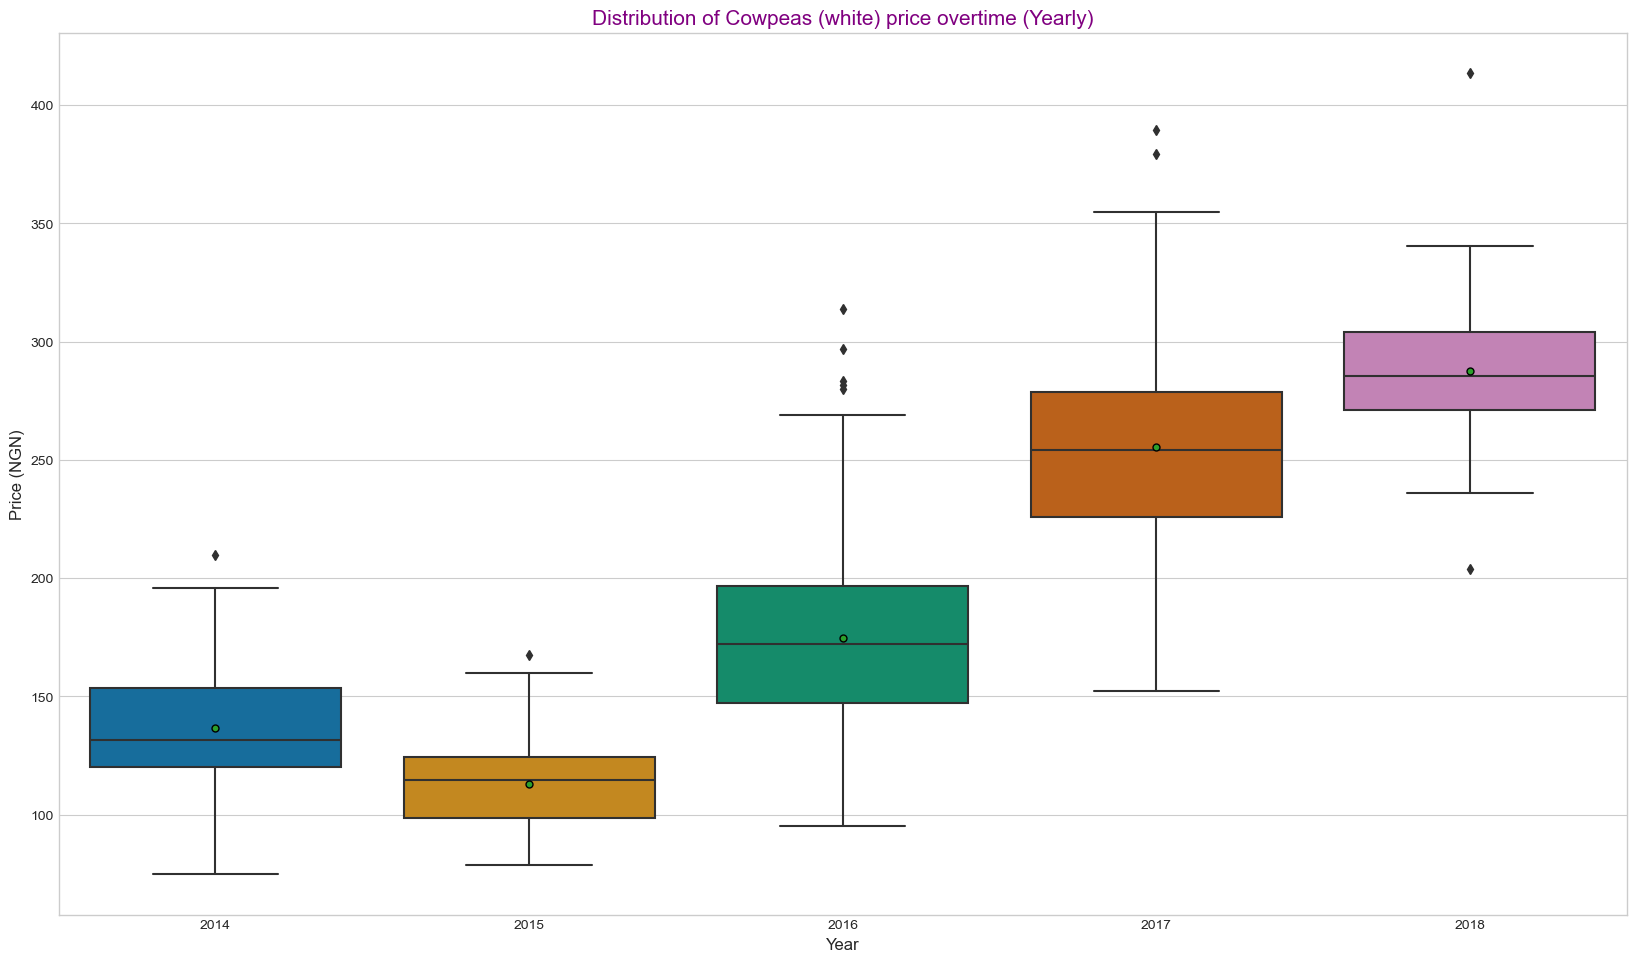

In [1453]:
# Note - The marker in the diagram (Distribution of Cowpeas (white) price overtime (Yearly)) represent the average price mark


plt.figure(figsize=(16, 9))
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')

sns.boxplot(data = updated_df_cowpea_w, x = updated_df_cowpea_w['date'].dt.year, y='price', palette = 'colorblind', showmeans = True,
           meanprops={"marker": "o", "markeredgecolor": "black", "markersize": "5"})

plt.title('Distribution of Cowpeas (white) price overtime (Yearly)', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.show()

In [1387]:
# Facts about Cowpeas (white)
# Note - Cowpeas (white) traded mostly during the years 2015, 2016 and 2017

No_of_cwtrades_yearly = updated_df_cowpea_w.groupby(updated_df_cowpea_w['date'].dt.year)['commodity'].value_counts().unstack()
No_of_cwtrades_yearly

commodity,Cowpeas (white)
date,
2014,67
2015,172
2016,180
2017,175
2018,70


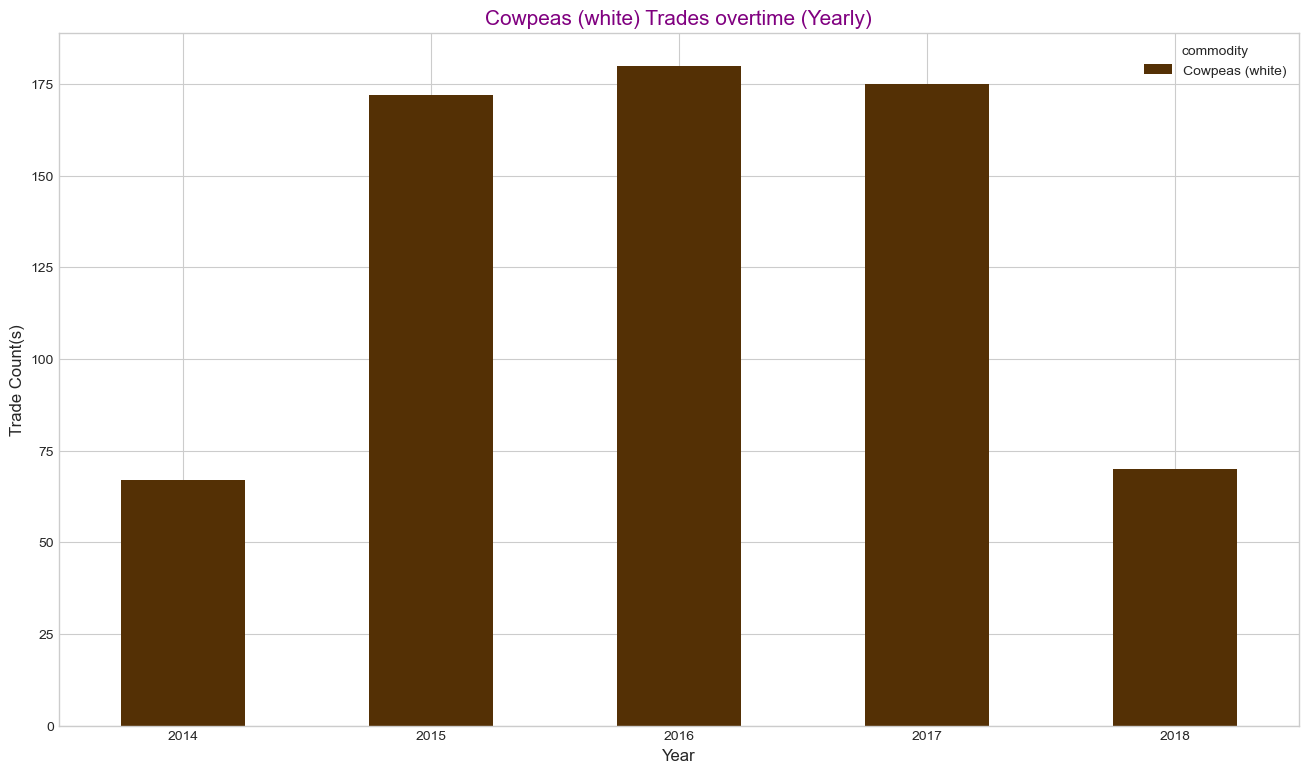

In [1388]:
# Facts about Cowpeas (white)
# Note - Cowpeas (white) trades were above 150 from 2015 to 2017
#        2014 and 2018 trades are below 75. 

No_of_cwtrades_yearly.plot(kind = 'bar',
                         figsize=(16, 9),
                         colormap = 'BrBG')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Trade Count(s)', fontsize = 12)
plt.xticks(rotation = 360)
plt.title('Cowpeas (white) Trades overtime (Yearly)', fontsize = 15, color = 'purple')
plt.show()

##### Are there any noticeable trends in the price data (over time) for Cowpeas (white)?

###### Answer

###### * Over the years (2015 to 2018), there has been steady price increase.

###### * The highest average price was recorded in 2018 this is due to high prices of Cowpeas (white) during this period despite the low trading volume (below 75)

###### * The lowest average price was recorded in 2015 despite the fact that there was high trading volume (above 150), this is due to low prices of Cowpeas (white) during this period


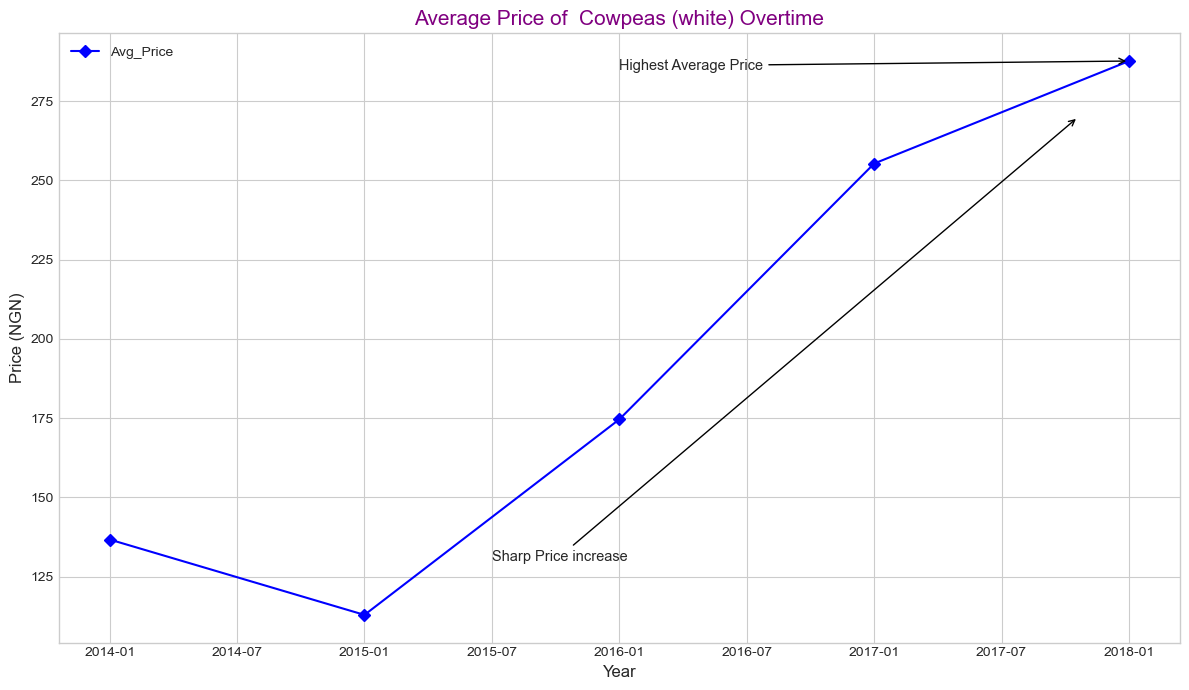

In [1389]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
plt.plot(Avg_p_cowpea_w, marker='D', color='b', label='Avg_Price')
plt.title('Average Price of  Cowpeas (white) Overtime', fontsize = 15, color = 'purple')

plt.annotate('Highest Average Price', 
             xy=(2018, 287.70), 
             xytext=(2016, 285),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)


plt.annotate('Sharp Price increase', 
             xy=(2017.8, 270), 
             xytext=(2015.5, 130),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize = 10.5)

plt.xticks([2014.0, 2014.5, 2015.0, 2015.5, 2016.0, 2016.5, 2017.0, 2017.5, 2018.0],
          labels = ['2014-01', '2014-07', '2015-01', '2015-07', '2016-01', '2016-07', '2017-01', '2017-07', '2018-01'])

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.legend()
plt.tight_layout()
plt.show()

##### How does Cowpeas (white) prices vary across different markets?

In [1390]:
# There are 16 unique markets that sells Cowpeas (white)

updated_df_cowpea_w['market_name'].nunique()

16

In [1391]:
# Facts about Cowpeas (white)
# All markets that sells Cowpeas (white)

# Note - There are 16 markets that supply Cowpeas (white), they are  
#        Ibadan, Dawanau, Lagos, Saminaka, Giwa, Gwandu,
#       Gombe, Gujungu, Dandume, Maiduguri, Kaura Namoda, Biu,
#       Mubi, Potiskum, Damaturu, and Aba

updated_df_cowpea_w['market_name'].unique()

array(['Ibadan', 'Dawanau', 'Lagos', 'Saminaka', 'Giwa', 'Gwandu',
       'Gombe', 'Gujungu', 'Dandume', 'Maiduguri', 'Kaura Namoda', 'Biu',
       'Mubi', 'Potiskum', 'Damaturu', 'Aba'], dtype=object)

In [1392]:
# Markets that supplies the most Cowpeas (white)
# 1 market (ibadan), supplied 48 times overtime, while 7 other markets supplied 47 times overtime.

updated_df_cowpea_w['market_name'].value_counts()

Ibadan          48
Lagos           47
Saminaka        47
Gwandu          47
Gombe           47
Gujungu         47
Maiduguri       47
Kaura Namoda    47
Dawanau         46
Dandume         44
Giwa            40
Biu             39
Potiskum        39
Damaturu        39
Mubi            34
Aba              6
Name: market_name, dtype: int64

In [1393]:
# Average price of Cowpeas (white) across all 16 markets (overtime)

Avg_mkt_cw = updated_df_cowpea_w.groupby('market_name')['price'].mean().round(2).sort_values(ascending = False)
Avg_mkt_cw

market_name
Aba             338.72
Biu             231.15
Lagos           215.84
Ibadan          200.62
Maiduguri       196.58
Saminaka        189.11
Mubi            188.92
Potiskum        184.44
Kaura Namoda    178.64
Dawanau         178.39
Gujungu         178.35
Gombe           175.33
Damaturu        174.90
Gwandu          174.66
Dandume         169.88
Giwa            163.38
Name: price, dtype: float64

In [1461]:
# Distribution of price of Cowpeas (white) across all 16 markets (Minimum, Average, Middle and Maximum price overtime)

mkt_cw_prange = updated_df_cowpea_w.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max'])
mkt_cw_prange

,min,mean,median,max
market_name,,,,
Aba,314.00,338.725000,332.000,389.60
Biu,80.00,231.151026,253.000,379.20
Damaturu,85.00,174.897436,173.000,291.67
Dandume,78.48,169.878182,158.400,294.80
Dawanau,97.50,178.388696,157.000,334.00
Giwa,80.00,163.378250,143.250,287.00
Gombe,82.50,175.328085,178.750,291.67
Gujungu,90.90,178.351277,160.000,298.00
Gwandu,74.72,174.663191,166.450,313.10


###### Answer

###### 12 markets have their average price between 150 and 199 naira (NGN) per KG overtime

###### 4 markets have their average price above 200 naira (NGN) per KG overtime (Aba, Biu, Lagos, Ibadan)

###### Aba market supplied the lowest in history (traded 6 times), despite this, it still recorded the highest average price in all markets (above 300 naira (NGN) price).

###### In Biu, Gombe and Mubi market, the price distribution is negatively skewed, which means `Cowpeas (white) is expensive here`. `(Check - mkt_cw_prange)`

###### In Aba, Damaturu, Dandume, Dawanau, Giwa, Gujungu, Gwandu, Ibadan, Kaura Namoda, Lagos, Maiduguri, Potiskum, and Saminaka market, the price distribution is positively skewed, which means `Cowpeas (white) is cheaper here`. `(Check - mkt_cw_prange)`

###### The highest price recorded in history was in lagos market. `(Check - mkt_cw_prange and Distribution of Cowpeas (white) price across all Market image below)`

###### The lowest price recorded in history was in Gwandu market. `(Check - mkt_cw_prange and Distribution of Cowpeas (white) price across all Market image below)`

In [1462]:
# Market order interms of increasing average price of Cowpeas (white)

cw_mktorder = updated_df_cowpea_w.groupby("market_name")["price"].mean().sort_values().index
cw_mktorder

Index(['Giwa', 'Dandume', 'Gwandu', 'Damaturu', 'Gombe', 'Gujungu', 'Dawanau',
       'Kaura Namoda', 'Potiskum', 'Mubi', 'Saminaka', 'Maiduguri', 'Ibadan',
       'Lagos', 'Biu', 'Aba'],
      dtype='object', name='market_name')

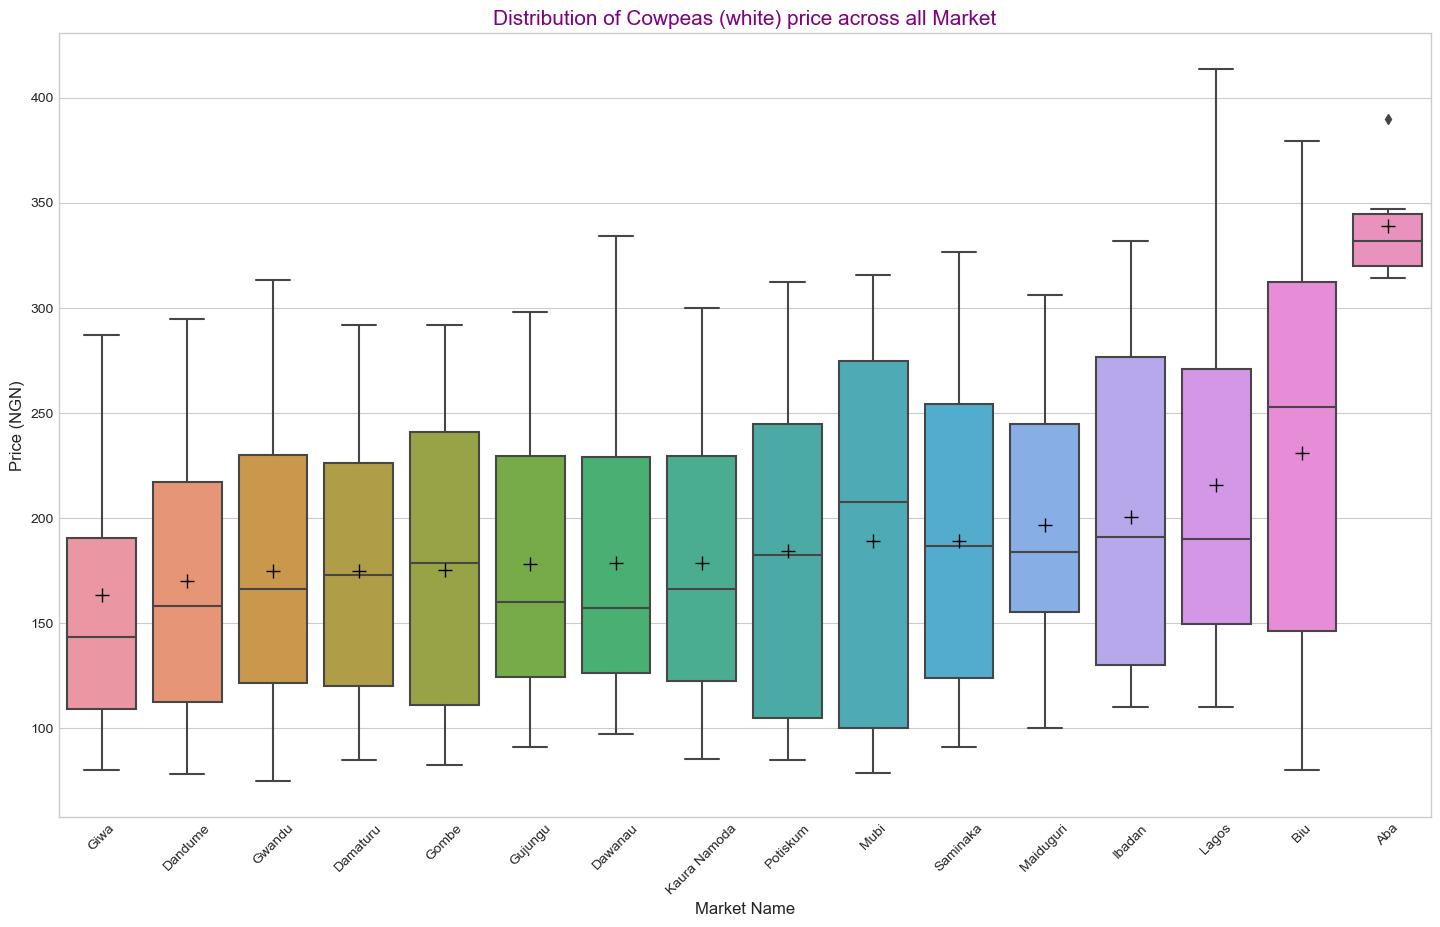

In [1463]:
# Note - The marker in the diagram (Distribution of Cowpeas (white) Price across all Market) represent the average price mark


plt.style.use('_mpl-gallery')
plt.figure(figsize=(14, 8))

sns.boxplot(data = updated_df_cowpea_w, x = 'market_name', y = 'price', showmeans = True, order = cw_mktorder,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xticks(rotation = 45)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.xlabel('Market Name', fontsize = 12)
plt.title('Distribution of Cowpeas (white) price across all Market', fontsize = 15, color = 'purple')
plt.show()

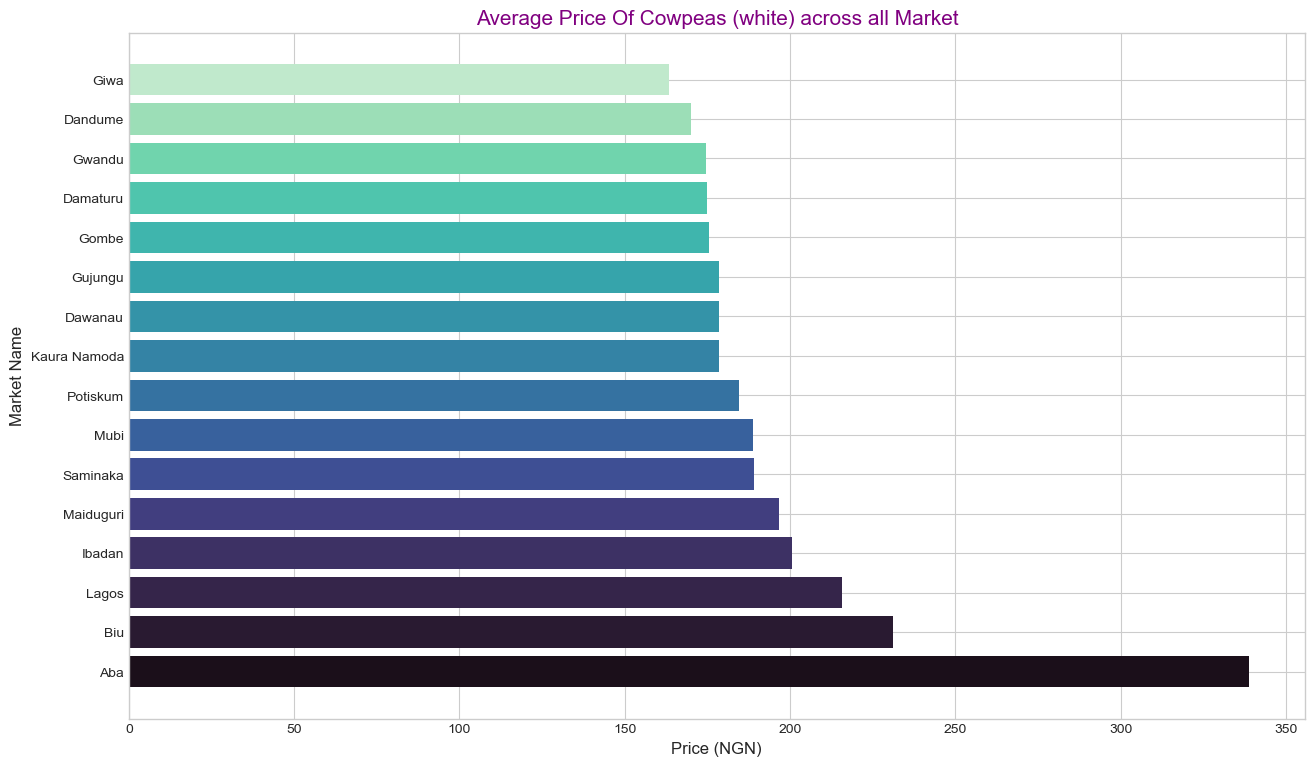

In [1394]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(12, 7))
plt.barh(Avg_mkt_cw.index, Avg_mkt_cw, color=sns.color_palette('mako', len(Avg_mkt_cw)))
plt.xlabel('Price (NGN)', fontsize = 12)
plt.ylabel('Market Name', fontsize = 12)
plt.title('Average Price Of Cowpeas (white) across all Market', fontsize = 15, color = 'purple')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Are there any states where Cowpeas (white) is consistently cheaper or expensive?

###### Answer

###### In Adamawa and Gombe state, the distribution of Cowpeas (white) is negatively skewed, `Cowpeas (white) is expensive here` `(Check - cw_s_prange)`

###### In Abia, Borno, Jigawa, Kaduna, Kano, Katsina, Kebbi, Lagos, Oyo, Yobe, and Zamfara state, the distribution of Cowpeas (white) is positively skewed, `Cowpeas (white) is cheaper here` `(Check - cw_s_prange)`

###### Lagos state records the highest price of Cowpeas (white) in history.

###### Kebbi state records the highest price of Cowpeas (white) in history.

In [1586]:
# Distribution of price of  Cowpeas (white) across all 13 states (Minimum, Average, Middle and Maximum price overtime)

cw_s_prange = updated_df_cowpea_w.groupby('state')['price'].agg(['min', 'mean', 'median', 'max'])
cw_s_prange

,min,mean,median,max
state,,,,
Abia,314.00,338.725000,332.000,389.60
Adamawa,78.75,188.921765,207.825,315.75
Borno,80.00,212.259767,203.400,379.20
Gombe,82.50,175.328085,178.750,291.67
Jigawa,90.90,178.351277,160.000,298.00
Kaduna,80.00,177.276782,154.000,326.32
Kano,97.50,178.388696,157.000,334.00
Katsina,78.48,169.878182,158.400,294.80
Kebbi,74.72,174.663191,166.450,313.10


In [1476]:
# State order interms of increasing average price of  Cowpeas (white)

s_cworder = updated_df_cowpea_w.groupby("state")["price"].mean().sort_values().index
s_cworder

Index(['Katsina', 'Kebbi', 'Gombe', 'Kaduna', 'Jigawa', 'Kano', 'Zamfara',
       'Yobe', 'Adamawa', 'Oyo', 'Borno', 'Lagos', 'Abia'],
      dtype='object', name='state')

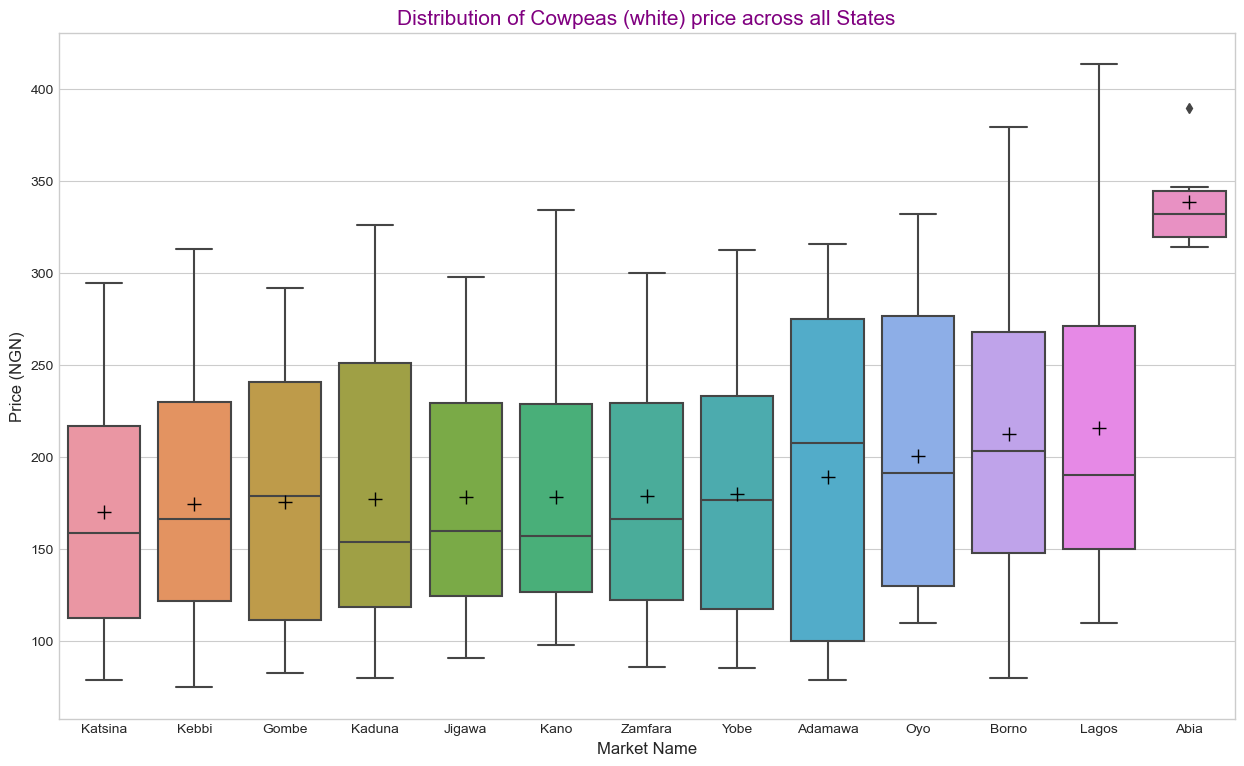

In [1477]:
# Note - The marker in the diagram (Distribution of Cowpeas (white) price across all States) represent the average price mark


plt.figure(figsize=(12, 7))
sns.boxplot(data = updated_df_cowpea_w, x = 'state', y = 'price', order = s_cworder, showmeans = True,
            meanprops={"marker": "+", "markeredgecolor": "black","markersize": "10"})

plt.xlabel('Market Name', fontsize = 12)
plt.ylabel('Price (NGN)', fontsize = 12)
plt.title('Distribution of Cowpeas (white) price across all States', fontsize = 15, color = 'purple')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 4) Commodity 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Which commodities have seen the highest price increases or decreases? (Price difference overtime) (From the 4 commodities chosen)

In [1493]:
# For (cereals and tubers - Millet) in naira(NGN)

updated_df_millet['price'].max() - updated_df_millet['price'].min()

260.0

In [1494]:
# For (non-food - (Fuel (diesel)) in naira(NGN)

df_fuel_diesel['price'].max() - df_fuel_diesel['price'].min()

600.0

In [1495]:
# For (oil and fats - (Oil (palm))) in naira(NGN)

updated_df_oil_palm['price'].max() - updated_df_oil_palm['price'].min()

19371.34

In [1672]:
# For (pulses and nuts (Cowpeas (white))) in naira(NGN)

updated_df_cowpea_w['price'].max() - updated_df_cowpea_w['price'].min()

339.01

###### Answer

###### * (Oil (palm) from oil and fats category has seen the greatest price difference overtime.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Are there commodities with stable prices over time? (From the 4 commodities chosen)

###### Answer
###### * For `(cereals and tubers - Millet)`, There was a slight stable average price range between the year 2009 to 2011 (Average price range was 156 naira to 164 naira) `(Check - Average Price of Millet Overtime image above)`


###### * For `(non-food - (Fuel (diesel))`, There was a slight stable average price range between the year 2014 to early 2016 (Average price range was 155 naira to 162 naira) `(Check - 'Average Price of  Fuel (diesel) Overtime image above)`

###### * For the other commodities (Oil (palm) and Cowpeas (white)), there was no stable average price range overtime.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### How do prices vary across different categories of commodities?

###### Answer

###### All categories are positively skewed, (the average price is greater than the median price), `(Check - cat_prange)`

###### They all have price anomalies (outliers)

###### Highest prices can be found in cereals and tubers category followed by pulses and nuts category `(Check - Distribution of price across all commodity categories image below)`

In [1534]:
# Distribution of price across all 4 categories (Minimum, Average, Middle and Maximum price overtime)

cat_prange = cmds.groupby('category')['price'].agg(['min', 'mean', 'median', 'max'])
cat_prange

,min,mean,median,max
category,,,,
cereals and tubers,22.0000,8245.064956,6300.0,90000.0
non-food,86.4000,157.950796,150.0,700.0
oil and fats,168.0000,2982.126073,1080.0,19375.0
pulses and nuts,112.3621,20078.466520,20000.0,52000.0


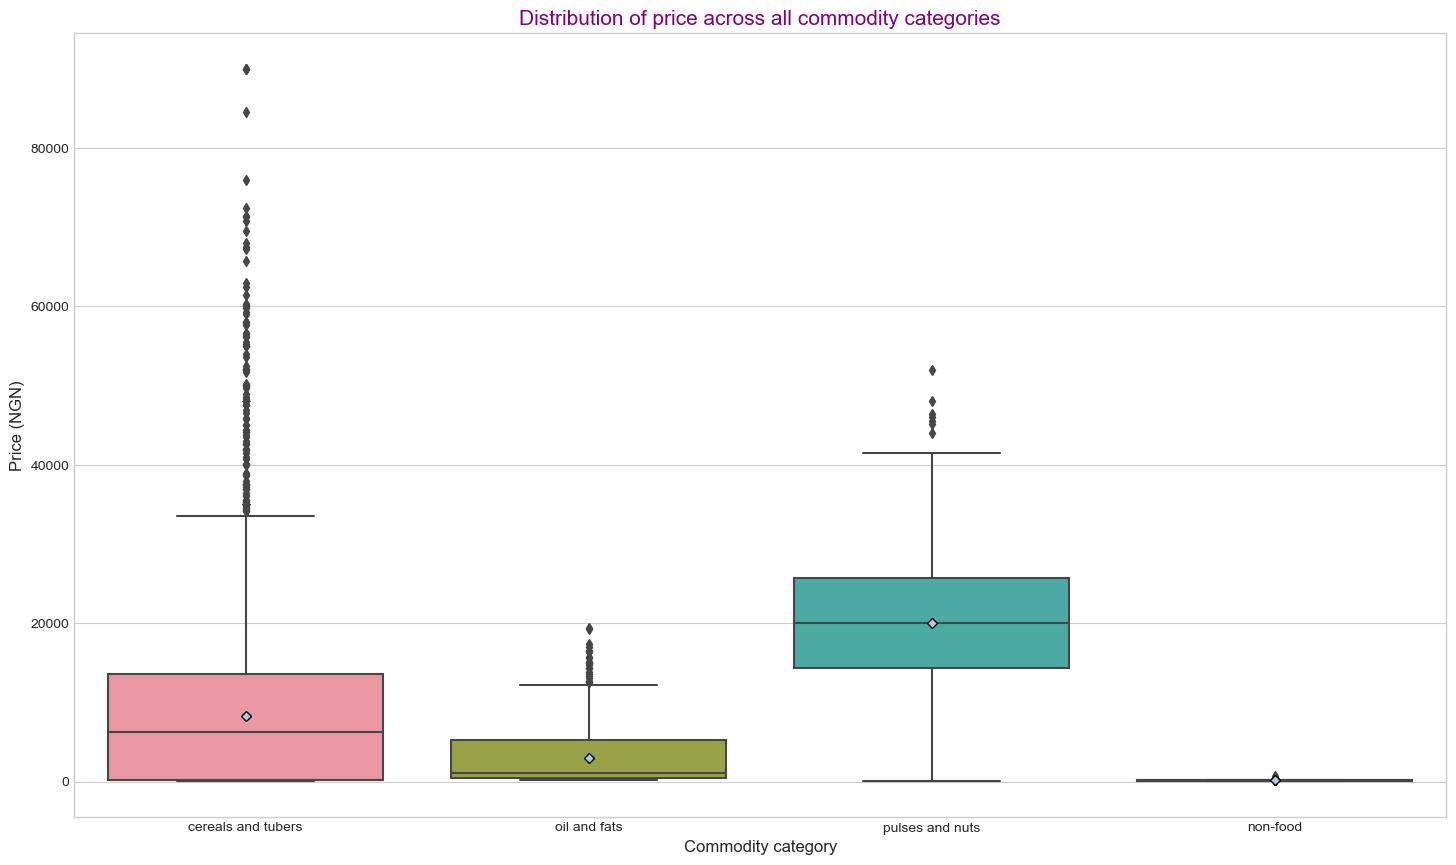

In [1533]:
# Note - The marker in the diagram (Distribution of price across all commodity categories) represent the average price mark


plt.figure(figsize=(14, 8))

sns.boxplot(data = cmds, x = 'category', y = 'price',
           showmeans = True,
           meanprops={"marker": "D", "markeredgecolor": "black","markersize": "5"})

plt.ylabel('Price (NGN)', fontsize = 12)
plt.xlabel('Commodity category', fontsize = 12)
plt.title('Distribution of price across all commodity categories', fontsize = 15, color = 'purple')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Are there categories that are more volatile in terms of pricing?

In [1552]:
# Distribution of price across all 4 categories (Minimum, Average, Middle, and Maximum price overtime with Standard Variation and Variance)

cat_pranges = cmds.groupby('category')['price'].agg(['min', 'mean', 'median', 'max', 'std', 'var'])
cat_pranges

,min,mean,median,max,std,var
category,,,,,,
cereals and tubers,22.0000,8245.064956,6300.0,90000.0,9176.509600,8.420833e+07
non-food,86.4000,157.950796,150.0,700.0,48.933434,2.394481e+03
oil and fats,168.0000,2982.126073,1080.0,19375.0,3625.379813,1.314338e+07
pulses and nuts,112.3621,20078.466520,20000.0,52000.0,8138.254036,6.623118e+07


In [1554]:
cat_pranges[['std', 'var']].sort_values('var', ascending = False)

,std,var
category,,
cereals and tubers,9176.509600,8.420833e+07
pulses and nuts,8138.254036,6.623118e+07
oil and fats,3625.379813,1.314338e+07
non-food,48.933434,2.394481e+03


###### Answer

###### Note - Higher Variance and Standard Deviation Indicates higher volatility

###### In terms of Price Volatility in commodity categories `(Check - cat_pranges)`

###### `cereals and tubers > pulses and nuts > oil and fats > non-food`

###### Which means cereals and tubers has the most volatile price while non-food has the least volatile price

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 5) Markets 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Which markets have the highest average prices for specific commodities? (From the 4 commodities chosen)

In [1563]:
# For (cereals and tubers - Millet) Maximum Average price in naira(NGN) is 281.75

Avg_mkt_p.head(1)

market_name
Aba    281.75
Name: price, dtype: float64

In [1564]:
# For (non-food - (Fuel (diesel)) Maximum Average price in naira(NGN) is 231.74

Avg_mkt_fd.head(1)

market_name
Potiskum    231.74
Name: price, dtype: float64

In [1565]:
# For (oil and fats - (Oil (palm))) Maximum Average price in naira(NGN) is 5981.07

Avg_mkt_op.head(1)

market_name
Maiduguri    5981.07
Name: price, dtype: float64

In [1566]:
# For (pulses and nuts (Cowpeas (white))) Maximum Average price in naira(NGN) is 338.72

Avg_mkt_cw.head(1)

market_name
Aba    338.72
Name: price, dtype: float64

###### Answer

###### For (cereals and tubers - Millet) - `Aba Market`

###### For (non-food - (Fuel (diesel)) - `Potiskum Market`

###### For (oil and fats - (Oil (palm)) - `Maiduguri market`

###### For (pulses and nuts (Cowpeas (white))) - `Aba Market`

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Are there markets that show higher volatility in prices?

In [1578]:
# For (cereals and tubers - Millet)

mill = updated_df_millet.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max', 'std', 'var']).sort_values('var', ascending = False)
mill

,min,mean,median,max,std,var
market_name,,,,,,
Ibadan,63.00,123.740208,111.875,226.00,51.858409,2689.294551
Lagos,70.00,132.698936,117.600,214.00,49.012817,2402.256253
Biu,48.00,112.758462,131.000,180.48,46.950161,2204.317650
Giwa,47.60,96.079000,71.165,185.00,45.051786,2029.663425
Gombe,41.80,93.872979,100.000,173.00,43.392474,1882.906817
Saminaka,45.60,100.346383,98.640,180.20,43.107502,1858.256750
Mai Adoua (CBM),78.60,168.678657,166.085,297.35,42.925038,1842.558852
Kaura Namoda,44.60,95.571489,97.150,167.20,42.531078,1808.892596
Gujungu,41.25,92.348936,94.900,176.50,41.642852,1734.127105


In [1583]:
# Which market has a positive skewed price distribution, lower Variance and Standard Deviation (which indicates lower volatility)
# Mubi is the best market to buy millet (Price is more stable here)
# Ibadan is the market that shows the highest volatility in millet price.

mill.loc[mill['mean'].round() > mill['median'].round()]

,min,mean,median,max,std,var
market_name,,,,,,
Ibadan,63.00,123.740208,111.875,226.00,51.858409,2689.294551
Lagos,70.00,132.698936,117.600,214.00,49.012817,2402.256253
Giwa,47.60,96.079000,71.165,185.00,45.051786,2029.663425
Saminaka,45.60,100.346383,98.640,180.20,43.107502,1858.256750
Mai Adoua (CBM),78.60,168.678657,166.085,297.35,42.925038,1842.558852
Illela (CBM),73.92,165.735479,162.100,261.86,40.915011,1674.038104
Dandume,48.05,93.296136,88.675,178.00,40.870173,1670.371080
Jibia (CBM),86.54,177.801951,175.000,298.77,39.420545,1553.979329
Mai Gatari (CBM),87.00,174.501786,174.215,250.00,38.178517,1457.599196


In [1588]:
# For (non-food - (Fuel (diesel)) (Minimum, Average, Middle, and Maximum price overtime with Standard Variation and Variance)

fuel_diesel = df_fuel_diesel.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max', 'std', 'var']).sort_values('var', ascending = False)
fuel_diesel

,min,mean,median,max,std,var
market_name,,,,,,
Gujungu,120.00,217.851064,160.000,700.0000,102.406262,10487.042553
Potiskum,160.00,231.744260,173.000,400.0000,80.597527,6495.961289
Damaturu,109.25,190.790795,203.000,274.6667,52.637844,2770.742668
Biu,100.00,185.976513,200.000,249.0000,46.409945,2153.882963
Mubi,130.00,192.225000,194.750,300.0000,45.344650,2056.137311
Gwandu,127.50,184.093617,165.000,281.0000,41.032716,1683.683763
Giwa,146.25,182.288750,160.000,260.0000,40.403077,1632.408652
Ibadan,120.00,175.395745,160.000,270.0000,40.159470,1612.783025
Kaura Namoda,120.00,173.433191,171.280,264.0000,35.045015,1228.153066


In [1589]:
# Which market has a positive skewed price distribution, lower Variance and Standard Deviation (which indicates lower volatility)
# Saminaka is the best market to buy Fuel (diesel) (Price is more stable here)
# Gujungu is the market that shows the highest volatility in Fuel (diesel) price.

fuel_diesel.loc[fuel_diesel['mean'].round() > fuel_diesel['median'].round()]

,min,mean,median,max,std,var
market_name,,,,,,
Gujungu,120.00,217.851064,160.00,700.0,102.406262,10487.042553
Potiskum,160.00,231.744260,173.00,400.0,80.597527,6495.961289
Gwandu,127.50,184.093617,165.00,281.0,41.032716,1683.683763
Giwa,146.25,182.288750,160.00,260.0,40.403077,1632.408652
Ibadan,120.00,175.395745,160.00,270.0,40.159470,1612.783025
Kaura Namoda,120.00,173.433191,171.28,264.0,35.045015,1228.153066
Maiduguri,122.00,181.287234,172.00,270.0,33.143239,1098.474290
Dandume,110.00,168.209545,165.00,232.5,32.015406,1024.986242
Aba,120.00,174.138889,160.00,220.0,29.720751,883.323016


In [1591]:
# For (oil and fats - (Oil (palm))) (Minimum, Average, Middle, and Maximum price overtime with Standard Variation and Variance)

oil_palm = updated_df_oil_palm.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max', 'std', 'var']).sort_values('var', ascending = False)
oil_palm

,min,mean,median,max,std,var
market_name,,,,,,
Maiduguri,324.67,5981.065319,7340.000,19375.00,5097.239642,2.598185e+07
Gujungu,266.66,2708.286170,383.000,17375.00,4471.661218,1.999575e+07
Gombe,380.00,4674.276596,5500.000,19250.00,3948.436194,1.559015e+07
Gwandu,338.67,4925.436170,5600.000,14715.00,3880.631774,1.505930e+07
Aba,203.33,3915.182632,4000.000,16500.00,3867.901040,1.496066e+07
Lagos,168.00,3867.484468,5060.000,6625.00,2667.780755,7.117054e+06
Dawanau,338.00,3581.594286,5060.000,7340.00,2555.726436,6.531738e+06
Saminaka,196.00,899.795106,750.000,5100.00,792.379846,6.278658e+05
Dandume,420.00,1166.727273,1125.000,3340.00,709.035444,5.027313e+05


In [1593]:
# Which market has a positive skewed price distribution, lower Variance and Standard Deviation (which indicates lower volatility)
# Mubi is the best market to buy Oil (palm) (Price is more stable here)
# Maiduguri is the market that shows the highest volatility in Oil (palm) price.

oil_palm.loc[oil_palm['mean'].round() > oil_palm['median'].round()]

,min,mean,median,max,std,var
market_name,,,,,,
Gujungu,266.66,2708.286170,383.000,17375.00,4471.661218,1.999575e+07
Saminaka,196.00,899.795106,750.000,5100.00,792.379846,6.278658e+05
Dandume,420.00,1166.727273,1125.000,3340.00,709.035444,5.027313e+05
Giwa,345.33,1241.269000,1230.000,2810.50,618.761757,3.828661e+05
Ibadan,240.00,665.496875,497.865,1070.75,317.248220,1.006464e+05
Biu,41.50,259.381538,121.200,640.00,241.275240,5.821374e+04
Damaturu,8.80,259.323846,235.260,538.00,194.977233,3.801612e+04
Mubi,3.66,169.176765,75.000,558.33,184.922860,3.419646e+04


In [1594]:
# For (pulses and nuts (Cowpeas (white))) (Minimum, Average, Middle, and Maximum price overtime with Standard Variation and Variance)

cowpeas_white = updated_df_cowpea_w.groupby('market_name')['price'].agg(['min', 'mean', 'median', 'max', 'std', 'var']).sort_values('var', ascending = False)
cowpeas_white

,min,mean,median,max,std,var
market_name,,,,,,
Biu,80.00,231.151026,253.000,379.20,89.723080,8050.231099
Mubi,78.75,188.921765,207.825,315.75,83.424045,6959.571263
Lagos,110.00,215.842128,190.000,413.73,77.621234,6025.055956
Ibadan,110.00,200.623750,191.000,332.00,76.198014,5806.137356
Potiskum,85.00,184.435385,182.650,312.50,73.054030,5336.891278
Gwandu,74.72,174.663191,166.450,313.10,70.253821,4935.599370
Saminaka,90.92,189.105319,186.500,326.32,70.071112,4909.960695
Dandume,78.48,169.878182,158.400,294.80,69.131128,4779.112908
Gombe,82.50,175.328085,178.750,291.67,68.009893,4625.345485


In [1595]:
# Which market has a positive skewed price distribution, lower Variance and Standard Deviation (which indicates lower volatility)
# Price is stable in Aba market
# Biu is the market that shows the highest volatility in Cowpeas (white) price.

cowpeas_white.loc[cowpeas_white['mean'].round() > cowpeas_white['median'].round()]

,min,mean,median,max,std,var
market_name,,,,,,
Lagos,110.00,215.842128,190.00,413.73,77.621234,6025.055956
Ibadan,110.00,200.623750,191.00,332.00,76.198014,5806.137356
Potiskum,85.00,184.435385,182.65,312.50,73.054030,5336.891278
Gwandu,74.72,174.663191,166.45,313.10,70.253821,4935.599370
Saminaka,90.92,189.105319,186.50,326.32,70.071112,4909.960695
Dandume,78.48,169.878182,158.40,294.80,69.131128,4779.112908
Giwa,80.00,163.378250,143.25,287.00,65.642795,4308.976528
Kaura Namoda,85.60,178.644468,166.20,300.00,64.627331,4176.691851
Dawanau,97.50,178.388696,157.00,334.00,63.482585,4030.038558


###### Answer

###### For (cereals and tubers - Millet) - `Ibadan is the market that shows the highest volatility in millet price.`

###### For (non-food - (Fuel (diesel)) - `Gujungu is the market that shows the highest volatility in Fuel (diesel) price.`

###### For (oil and fats - (Oil (palm))) - `Maiduguri is the market that shows the highest volatility in Oil (palm) price.`

###### For (pulses and nuts (Cowpeas (white)) - `Biu is the market that shows the highest volatility in Cowpeas (white) price.`

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 6) Enterprises 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### What is the span of enterprise(s) overtime? (From the 4 commodities chosen)

In [1704]:
# For (cereals and tubers - Millet)

for_millet = updated_df_millet.pivot_table(index=updated_df_millet['date'].dt.year, columns='enterprise', values='price', aggfunc = 'count').reset_index()
for_millet['Retail'].fillna(0, inplace = True)
for_millet = for_millet.astype(int)
for_millet

enterprise,date,Retail,Wholesale
0,2002,0,25
1,2003,0,33
2,2005,0,32
3,2006,0,13
4,2007,0,10
5,2008,0,46
6,2009,0,40
7,2010,0,59
8,2011,0,60
9,2012,0,55


In [1723]:
order = updated_df_oil_palm['enterprise'].sort_values(ascending = False).unique()
order

array(['Wholesale', 'Retail'], dtype=object)

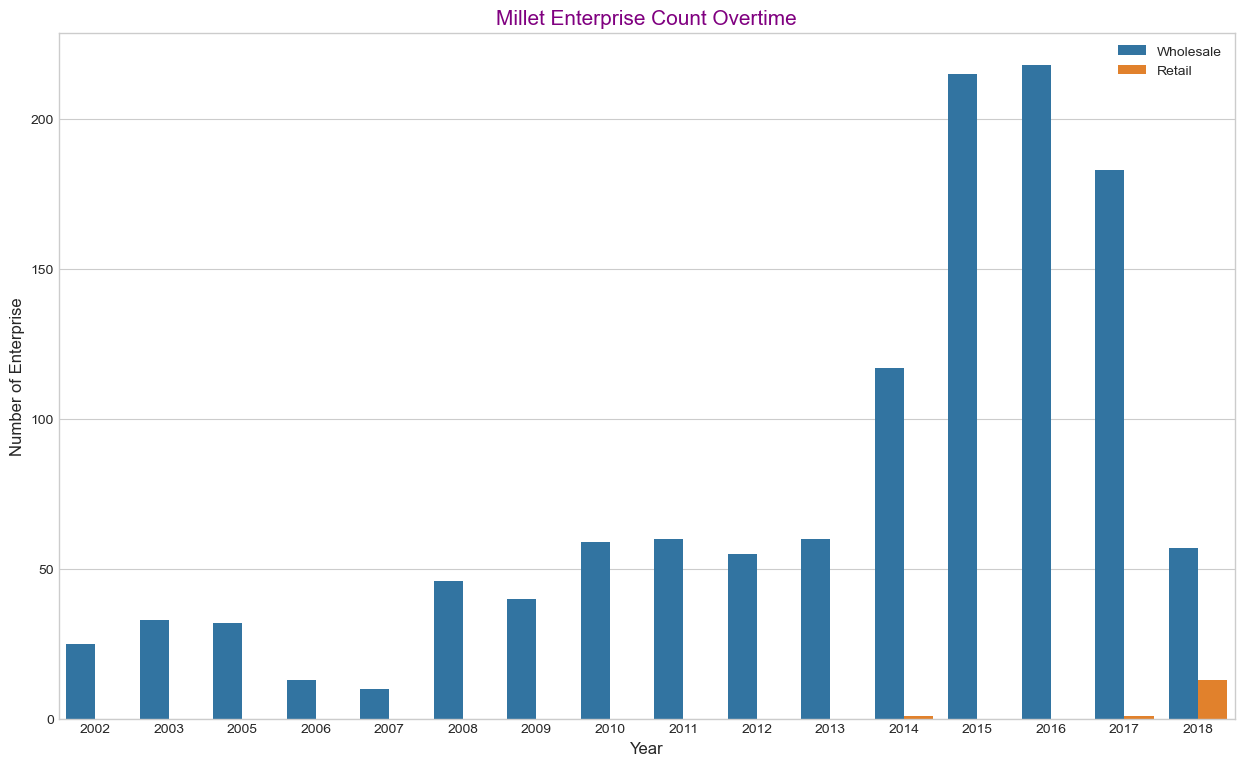

In [1724]:
plt.figure(figsize=(12, 7))
sns.countplot(data = updated_df_millet, x = updated_df_millet['date'].dt.year, hue = 'enterprise', palette='tab10', hue_order = order)
plt.title('Millet Enterprise Count Overtime', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Enterprise', fontsize = 12)
plt.legend()
plt.show()

In [1673]:
# For (non-food - (Fuel (diesel))

for_fuel_diesel = df_fuel_diesel.pivot_table(index=df_fuel_diesel['date'].dt.year, columns='enterprise', values='price', aggfunc = 'count').reset_index()
for_fuel_diesel

enterprise,date,Retail
0,2014,73
1,2015,176
2,2016,179
3,2017,167
4,2018,70


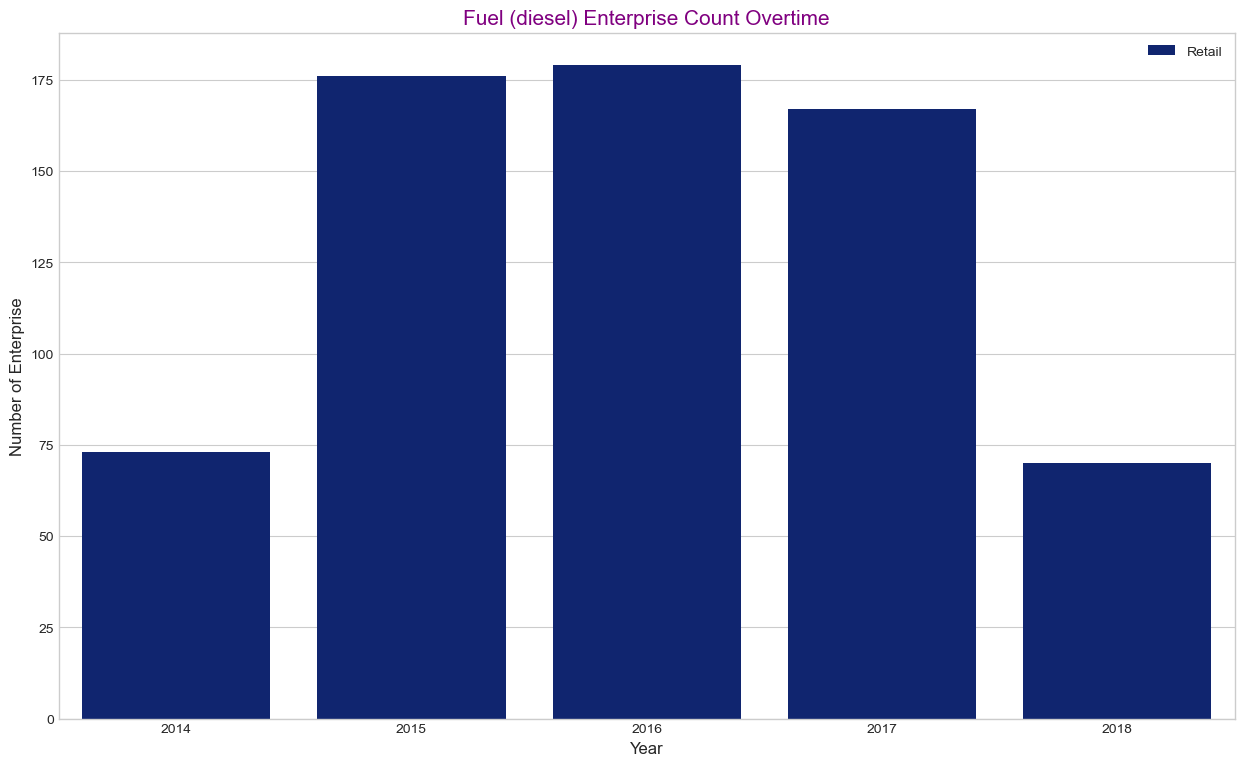

In [1692]:
plt.figure(figsize=(12, 7))
sns.countplot(data = df_fuel_diesel, x = df_fuel_diesel['date'].dt.year, hue = 'enterprise', palette='dark')
plt.title('Fuel (diesel) Enterprise Count Overtime', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Enterprise', fontsize = 12)
plt.legend()
plt.show()

In [1624]:
# For (oil and fats - (Oil (palm))

for_oilpalm = updated_df_oil_palm.pivot_table(index=updated_df_oil_palm['date'].dt.year, columns='enterprise', values='price', aggfunc = 'count').reset_index()
for_oilpalm

enterprise,date,Retail,Wholesale
0,2014,8,65
1,2015,27,150
2,2016,30,147
3,2017,49,122
4,2018,25,45


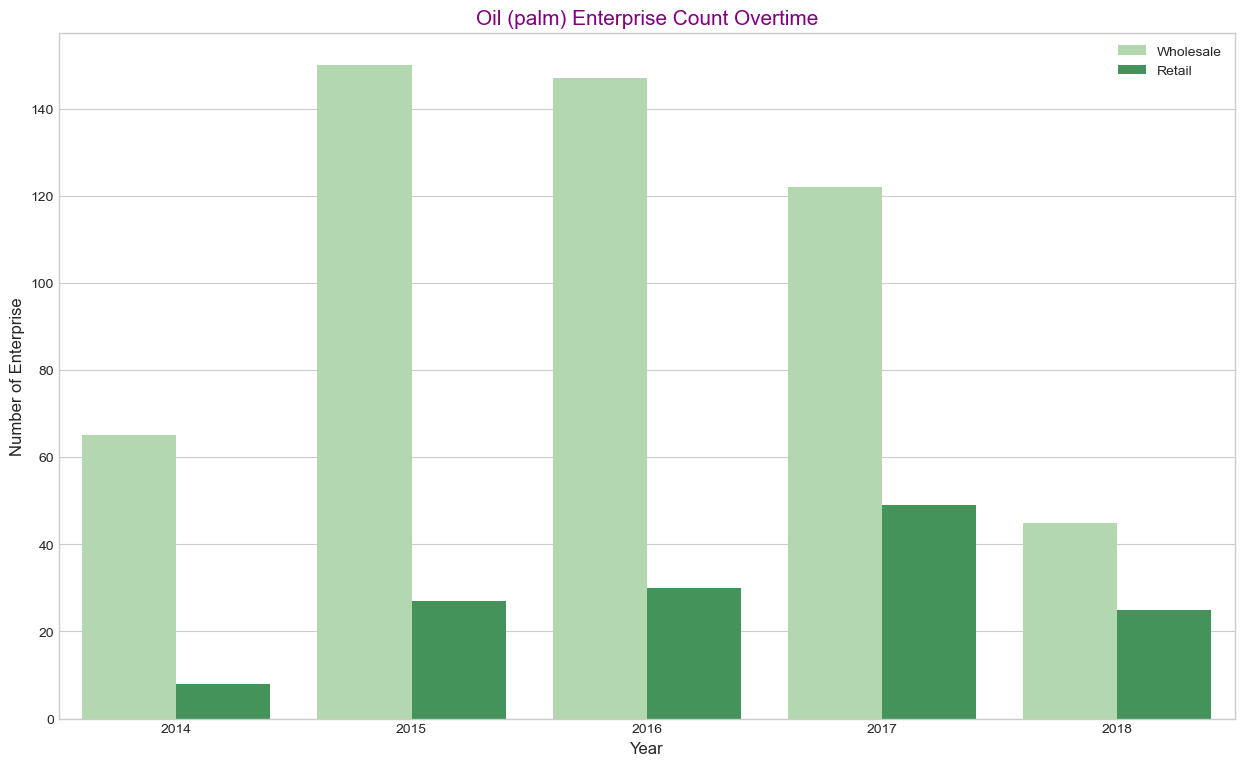

In [1725]:
plt.figure(figsize=(12, 7))
sns.countplot(data = updated_df_oil_palm, x = updated_df_oil_palm['date'].dt.year, hue = 'enterprise', palette='Greens', hue_order = order)
plt.title('Oil (palm) Enterprise Count Overtime', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Enterprise', fontsize = 12)
plt.legend()
plt.show()

In [1703]:
# For (pulses and nuts (Cowpeas (white))

for_cowpea = updated_df_cowpea_w.pivot_table(index=updated_df_cowpea_w['date'].dt.year, columns='enterprise', values='price', aggfunc = 'count').reset_index()
for_cowpea['Retail'].fillna(0, inplace = True)
for_cowpea = for_cowpea.astype(int)
for_cowpea

enterprise,date,Retail,Wholesale
0,2014,1,66
1,2015,0,172
2,2016,0,180
3,2017,0,175
4,2018,13,57


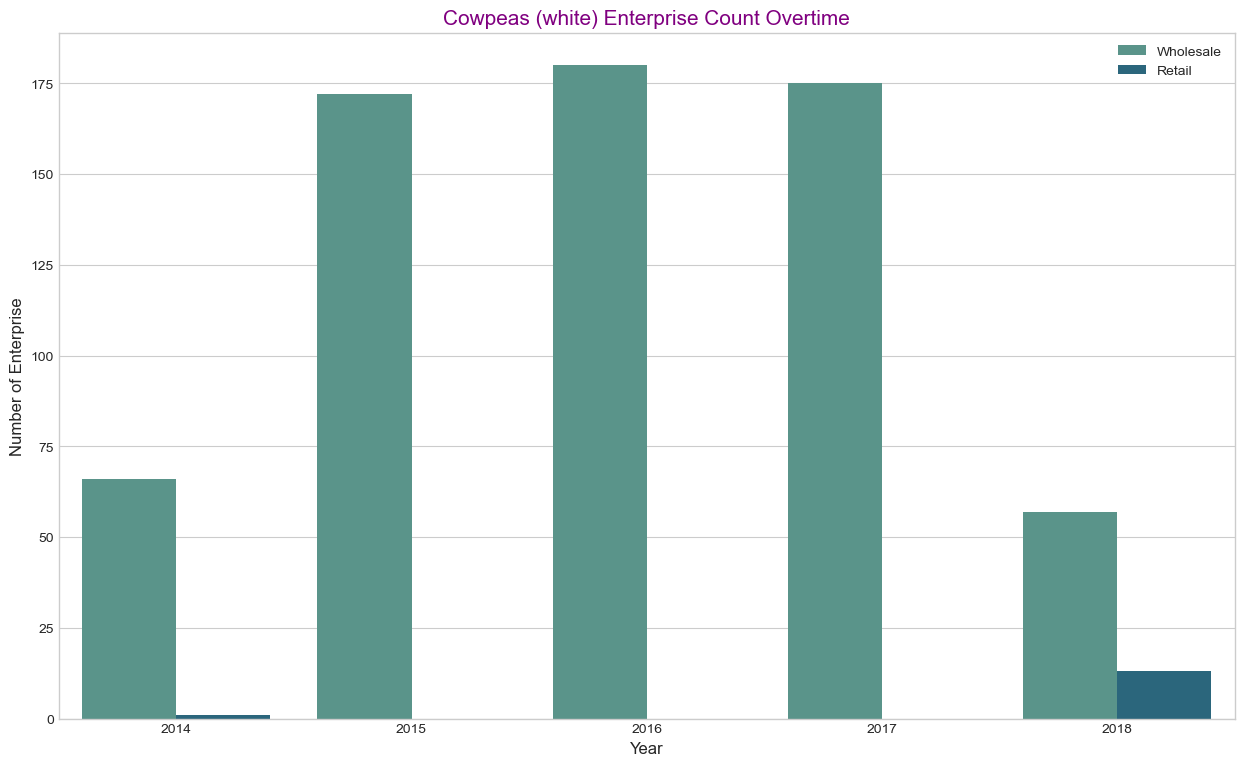

In [1726]:
plt.figure(figsize=(12, 7))
sns.countplot(data = updated_df_cowpea_w, x = updated_df_cowpea_w['date'].dt.year, hue = 'enterprise', palette='crest', hue_order = order)
plt.title('Cowpeas (white) Enterprise Count Overtime', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Enterprise', fontsize = 12)
plt.legend()
plt.show()

###### Answer

###### For all the 4 commodities, Wholesalers dominated every year, in fact in some years retailers don't trade, except for Fuel (diesel) where the only distributing enterprise are retailers.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)